<a class="anchor" id="description"></a>
# Описание и выбор задачи
Тема практики — анализ связи целей студентов и характеристик образовательного опыта.
Лаборатория образовательного опыта — одно из подразделений Практикума. Здесь изучают, насколько успешно студенты проходят обучение, соответствуют ли учебные результаты их целям и ожиданиям.
Вам предстоит исследовать данные, предоставленные Лабораторией, сформулировать и самостоятельно решить задачу, которая поможет Лаборатории в её работе.
### Задача
Изучить, есть ли закономерности между тем, какие цели ставят студенты и по каким причинам они бросают обучение.


# Описание данных
### practice_data.xlsx
- Файл с данными разбит на четыре раздела:
- Образовательные характеристики — результаты опросов студентов о различных характеристиках образовательного опыта.
- Цели — результаты опросов студентов о соответствии целей курсов реальным образовательным результатам.
- Причины возвратов — ситуации возвратов оплаты за курсы с указанием их причин.
- Промокоды — приглашения для друзей, использованные студентами курса.
### Таблица Образовательные характеристики
- date_response — дата заполнения опросника,
- user_id — уникальный идентификатор респондента,
- current_cohort org — текущая когорта респондента,
- cohort org — исходная когорта респондента,
- profession_name org — наименование профессии,
- sprint_position — прогресс респондента по учебным материалам курса,
- category_num — категория вопроса,
- measure_num — порядковый номер вопроса внутри категории,
- question_number — код вопроса,
- statement_content — текст вопроса,
- grade_content — текст ответа,
- value — код ответа.
### Таблица Цели
- date_response — дата заполнения опросника,
- user_id — уникальный идентификатор респондента,
- current_cohort org — текущая когорта респондента,
- cohort org — исходная когорта респондента,
- profession_name org — наименование профессии,
- course_name org — наименование текущего спринта,
- topic_name org — наименование текущего раздела,
- sprint_position — прогресс респондента по учебным материалам курса,
- lesson_name org — наименование текущего урока,
- statement_content — текст вопроса,
- grade_content — текст выбранного ответа,
- value — индекс выбранного ответа.
### Таблица Причины возвратов
- user_id — уникальный идентификатор студента,
- client_id — уникальный идентификатор студента как клиента,
- payment_id — уникальный идентификатор оплаты,
- first squad — исходная когорта студента,
- current squad — текущая когорта студента,
- churn date — дата оформления возврата,
- churn type — метод оформления возврата,
- profession name — наименование профессии,
- churn_group — группа возврата, с которой ассоциируется студент,
- refund_reason — причина возврата.

<a class="anchor" id="toc"></a>
# Оглавление
 - [Описание данных](#description)
 - [Чистка и первичная обработка данных](#eda)
 - [Решение задачи бизнеса](#research)

<a class="anchor" id="eda"></a>
# Чистка и первичная обработка данных

# Первый шаг
Из общего набора данных выберите таблицы, которые нужны для решения вашей задачи. Опишите, почему вы выбрали именно их.

Моя цель - изучить, есть ли закономерности между тем, какие цели ставят студенты и по каким причинам они бросают обучение. Поэтому мне нужны следующие таблицы:
- Образовательные характеристики (нужны основные данные студентов)
- Цели (нужна информация о целях студентов)
- Причины возвратов (нужна информация о причинах возвратов)

# Второй шаг
Проведите исследовательский анализ данных. Ответьте на вопросы:
- Есть ли пересечения данных между таблицами? Например, есть ли пользователи, встречающиеся одновременно в нескольких таблицах?
- Встречаются ли в данных пропуски и дубликаты? Нужно ли их удалить или заполнить?
- За какие временные интервалы доступны данные?
- Какие из переменных в таблицах категориальные, а какие численные?
- К каким распределениям относятся числовые переменные? Встречаются ли в них выбросы?
- Есть ли связи между числовыми переменными?
- Каким образом наблюдения распределены по значениям категориальных переменных? Есть ли связи между категориальными переменными?

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

df_char = pd.read_excel('practice_data.xlsx', sheet_name='Образовательные характеристики')
df_goals = pd.read_excel('practice_data.xlsx', sheet_name='Цели')
df_returns = pd.read_excel('practice_data.xlsx', sheet_name='Причины возвратов')
print(df_char.columns)
print(df_goals.columns)
print(df_returns.columns)

Index(['date_response', 'user_id', 'current_cohort org', 'cohort org',
       'profession_name org', 'sprint_position', 'statement_content',
       'grade_content', 'value', 'question_number', 'measure_num',
       'category_num'],
      dtype='object')
Index(['date_response', 'user_id', 'current_cohort org', 'cohort org',
       'profession_name org', 'course_name org', 'topic_name org',
       'sprint_position', 'lesson_name org', 'statement_content',
       'grade_content', 'value'],
      dtype='object')
Index(['user_id', 'client_id', 'payment_id', 'first squad', 'current squad ',
       'churn date', 'churn type', 'profession name', 'churn_group',
       'refund_reason'],
      dtype='object')


In [2]:
df_char.rename(columns={
    'current_cohort org': 'current_cohort',
    'profession_name org': 'profession_name',
    'cohort org': 'cohort'
}, inplace=True)
print(df_char.columns)

df_goals.rename(columns={
    'current_cohort org': 'current_cohort',
    'cohort org': 'cohort',
    'profession_name org': 'profession_name',
    'course_name org': 'course_name',
    'topic_name org': 'topic_name',
    'lesson_name org': 'lesson_name'
}, inplace=True)
print(df_goals.columns)

df_returns.rename(columns={
    'first squad': 'cohort',
    'current squad ': 'current_cohort',
    'churn date': 'churn_date',
    'churn type': 'churn_type',
    'profession name': 'profession_name'
}, inplace=True)
print(df_returns.columns)

Index(['date_response', 'user_id', 'current_cohort', 'cohort',
       'profession_name', 'sprint_position', 'statement_content',
       'grade_content', 'value', 'question_number', 'measure_num',
       'category_num'],
      dtype='object')
Index(['date_response', 'user_id', 'current_cohort', 'cohort',
       'profession_name', 'course_name', 'topic_name', 'sprint_position',
       'lesson_name', 'statement_content', 'grade_content', 'value'],
      dtype='object')
Index(['user_id', 'client_id', 'payment_id', 'cohort', 'current_cohort',
       'churn_date', 'churn_type', 'profession_name', 'churn_group',
       'refund_reason'],
      dtype='object')


Cоздадим словарь для перевода названий столбцов на русский язык (это пригодится для построения конечных таблиц и графиков для презентации)

In [3]:
dict_names = {
    'date_response' : 'дата заполнения опросника',
    'user_id' : 'id респондента', 
    'current_cohort' : 'текущая когорта', 
    'cohort' : 'исходная когорта',
    'profession_name' : 'название профессии', 
    'sprint_position' : 'прогресс студента', 
    'statement_content' : 'текст вопроса',
    'grade_content' : 'текст ответа',
    'value' : 'индекс ответа',
    'question_number' : 'код вопроса',
    'measure_num' : 'номер вопроса в категории',
    'category_num' : 'категория вопроса',
    'course_name' : 'название текущего спринта',
    'topic_name' : 'название текущего раздела',
    'lesson_name' : 'название текущего урока',
    'client_id' : 'id клиента',
    'payment_id' : 'id оплаты',
    'churn_date' : 'дата возврата',
    'churn_type' : 'метод возврата',
    'churn_group' : 'группа возврата',
    'refund_reason' : 'причина возврата'
}

## Есть ли пересечения данных между таблицами? Например, есть ли пользователи, встречающиеся одновременно в нескольких таблицах?

In [4]:
# Merge таблиц по столбцу 'A'
merged_df = pd.merge(df_char, df_goals, on='user_id', how='outer')

# Подсчет значений, которые есть в обеих таблицах, только в левой таблице и только в правой таблице
both_tables_count = merged_df[['user_id']].count()
left_table_only_count = merged_df[['date_response_x']].count() - both_tables_count
right_table_only_count = merged_df[['date_response_y']].count() - both_tables_count

# Вывод результатов
print("Количество значений, которые есть в обеих таблицах:")
print(both_tables_count)
print("\nКоличество значений, которые есть только в таблице df_char:")
print(left_table_only_count)
print("\nКоличество значений, которые есть только в таблице df_goals:")
print(right_table_only_count)

Количество значений, которые есть в обеих таблицах:
user_id    77845
dtype: int64

Количество значений, которые есть только в таблице df_char:
date_response_x   NaN
user_id           NaN
dtype: float64

Количество значений, которые есть только в таблице df_goals:
date_response_y   NaN
user_id           NaN
dtype: float64


In [5]:
# Merge таблиц по столбцу 'A'
merged_df = pd.merge(df_char, df_returns, on='user_id', how='outer')

# Подсчет значений, которые есть в обеих таблицах, только в левой таблице и только в правой таблице
both_tables_count = merged_df[['user_id']].count()
left_table_only_count = merged_df[['date_response']].count() - both_tables_count
right_table_only_count = merged_df[['client_id']].count() - both_tables_count

# Вывод результатов
print("Количество значений, которые есть в обеих таблицах:")
print(both_tables_count)
print("\nКоличество значений, которые есть только в таблице df_char:")
print(left_table_only_count)
print("\nКоличество значений, которые есть только в таблице df_returns:")
print(right_table_only_count)

Количество значений, которые есть в обеих таблицах:
user_id    17493
dtype: int64

Количество значений, которые есть только в таблице df_char:
date_response   NaN
user_id         NaN
dtype: float64

Количество значений, которые есть только в таблице df_returns:
client_id   NaN
user_id     NaN
dtype: float64


In [6]:
# Merge таблиц по столбцу 'A'
merged_df = pd.merge(df_returns, df_goals, on='user_id', how='outer')

# Подсчет значений, которые есть в обеих таблицах, только в левой таблице и только в правой таблице
both_tables_count = merged_df[['user_id']].count()
left_table_only_count = merged_df[['client_id']].count() - both_tables_count
right_table_only_count = merged_df[['date_response']].count() - both_tables_count

# Вывод результатов
print("Количество значений, которые есть в обеих таблицах:")
print(both_tables_count)
print("\nКоличество значений, которые есть только в таблице df_returns:")
print(left_table_only_count)
print("\nКоличество значений, которые есть только в таблице df_goals:")
print(right_table_only_count)

Количество значений, которые есть в обеих таблицах:
user_id    2969
dtype: int64

Количество значений, которые есть только в таблице df_returns:
client_id   NaN
user_id     NaN
dtype: float64

Количество значений, которые есть только в таблице df_goals:
date_response   NaN
user_id         NaN
dtype: float64


## Встречаются ли в данных пропуски и дубликаты? Нужно ли их удалить или заполнить?

In [7]:
print(df_char[df_char.duplicated()])
print(df_goals[df_goals.duplicated()])
print(df_returns[df_returns.duplicated()])

Empty DataFrame
Columns: [date_response, user_id, current_cohort, cohort, profession_name, sprint_position, statement_content, grade_content, value, question_number, measure_num, category_num]
Index: []
Empty DataFrame
Columns: [date_response, user_id, current_cohort, cohort, profession_name, course_name, topic_name, sprint_position, lesson_name, statement_content, grade_content, value]
Index: []
Empty DataFrame
Columns: [user_id, client_id, payment_id, cohort, current_cohort, churn_date, churn_type, profession_name, churn_group, refund_reason]
Index: []


In [8]:
print('df_char')
print(df_char['current_cohort'].unique())
print(df_char['cohort'].unique())
print(df_char['profession_name'].unique())
print(df_char['statement_content'].unique())
print(df_char['grade_content'].unique())
print('')
print('df_goals')
print(df_goals['current_cohort'].unique())
print(df_goals['cohort'].unique())
print(df_goals['profession_name'].unique())
print(df_goals['course_name'].unique())
print(df_goals['topic_name'].unique())
print(df_goals['lesson_name'].unique())
print(df_goals['statement_content'].unique())
print(df_goals['grade_content'].unique())
print('')
print('df_returns')
print(df_goals['current_cohort'].unique())
print(df_goals['cohort'].unique())
print(df_returns['profession_name'].unique())
print(df_returns['churn_type'].unique())
print(df_returns['refund_reason'].unique())

df_char
['designer_cohort_20' 'designer_cohort_19' 'designer_cohort_17C'
 'designer_cohort_18' nan 'designer_cohort_17' 'designer_cohort_18_dop'
 'designer_cohort_22' 'designer_cohort_21'
 'designer_cohort_praktikum_9_months' 'designer_cohort_23'
 'designer_plus_cohort_01' 'designer_cohort_25' 'designer_cohort_24'
 'designer-plus_cohort_02' 'designer-plus_cohort_03' 'designer_cohort_27'
 'designer_cohort_16' 'designer-plus_cohort_04' 'designer_cohort_16C'
 'designer-plus_cohort_praktikum' 'designer_cohort_praktikum_8_months'
 'designer-plus_cohort_05' 'designer_cohort_15C' 'designer_cohort_26'
 'designer-plus_cohort_06' 'designer_cohort_28']
['designer_cohort_19' 'designer_cohort_17C' 'designer_cohort_18'
 'designer_cohort_21' 'designer_cohort_22' 'designer_cohort_17'
 'designer_cohort_18_dop' 'designer_cohort_praktikum_9_months'
 'designer_cohort_20' 'designer_cohort_23' 'designer_plus_cohort_01'
 'designer_cohort_16' 'designer_cohort_praktikum_8_months'
 'designer_cohort_16C' 'design

### Когорты

In [9]:
import re

df_char['cohort'] = df_char['cohort'].str.replace('designer-plus', 'designer_plus')
df_char['cohort'] = df_char['cohort'].str.replace('_praktikum', '')
df_char['cohort'] = df_char['cohort'].str.replace('_8', '_08')
df_char['cohort'] = df_char['cohort'].str.replace('_9', '_09')
df_char['cohort'] = df_char['cohort'].str.replace('_dop', '')
df_char['cohort'] = df_char['cohort'].str.replace('C', '')
df_char['cohort'] = df_char['cohort'].str.replace('_months', '')

df_char['current_cohort'] = df_char['current_cohort'].str.replace('designer-plus', 'designer_plus')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('_praktikum', '')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('_8', '_08')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('_9', '_09')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('_dop', '')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('C', '')
df_char['current_cohort'] = df_char['current_cohort'].str.replace('_months', '')

print(df_char['current_cohort'].unique())
print(df_char['cohort'].unique())

['designer_cohort_20' 'designer_cohort_19' 'designer_cohort_17'
 'designer_cohort_18' nan 'designer_cohort_22' 'designer_cohort_21'
 'designer_cohort_09' 'designer_cohort_23' 'designer_plus_cohort_01'
 'designer_cohort_25' 'designer_cohort_24' 'designer_plus_cohort_02'
 'designer_plus_cohort_03' 'designer_cohort_27' 'designer_cohort_16'
 'designer_plus_cohort_04' 'designer_plus_cohort' 'designer_cohort_08'
 'designer_plus_cohort_05' 'designer_cohort_15' 'designer_cohort_26'
 'designer_plus_cohort_06' 'designer_cohort_28']
['designer_cohort_19' 'designer_cohort_17' 'designer_cohort_18'
 'designer_cohort_21' 'designer_cohort_22' 'designer_cohort_09'
 'designer_cohort_20' 'designer_cohort_23' 'designer_plus_cohort_01'
 'designer_cohort_16' 'designer_cohort_08' 'designer_plus_cohort'
 'designer_cohort_24' 'designer_plus_cohort_02' 'designer_cohort_15'
 'designer_cohort_25' 'designer_plus_cohort_03' 'designer_cohort_26'
 'designer_plus_cohort_04' 'designer_cohort_27' 'designer_plus_cohort_0

In [10]:
import re

df_goals['cohort'] = df_goals['cohort'].str.replace('designer-plus', 'designer_plus')
df_goals['cohort'] = df_goals['cohort'].str.replace('_praktikum', '')
df_goals['cohort'] = df_goals['cohort'].str.replace('_8', '_08')
df_goals['cohort'] = df_goals['cohort'].str.replace('_9', '_09')
df_goals['cohort'] = df_goals['cohort'].str.replace('_dop', '')
df_goals['cohort'] = df_goals['cohort'].str.replace('C', '')
df_goals['cohort'] = df_goals['cohort'].str.replace('_months', '')

df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('designer-plus', 'designer_plus')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('_praktikum', '')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('_8', '_08')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('_9', '_09')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('_dop', '')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('C', '')
df_goals['current_cohort'] = df_goals['current_cohort'].str.replace('_months', '')

print(df_goals['current_cohort'].unique())
print(df_goals['cohort'].unique())

['designer_cohort_18' 'designer_plus_cohort_04' 'designer_cohort_16'
 'designer_cohort_23' 'designer_plus_cohort_02' 'designer_cohort_24'
 'designer_cohort_25' 'designer_plus_cohort_05' 'designer_plus_cohort_03'
 'designer_cohort_17' 'designer_cohort_27' 'designer_cohort_26'
 'designer_cohort_09' 'designer_plus_cohort_06' 'designer_cohort_28'
 'designer_cohort_29' 'designer_plus_cohort_07']
['designer_cohort_18' 'designer_plus_cohort_01' 'designer_cohort_16'
 'designer_cohort_23' 'designer_plus_cohort_02' 'designer_cohort_24'
 'designer_plus_cohort_03' 'designer_cohort_25' 'designer_cohort_09'
 'designer_plus_cohort_04' 'designer_cohort_26' 'designer_cohort_27'
 'designer_plus_cohort_05' 'designer_cohort_28' 'designer_plus_cohort_06']


In [11]:
df_returns['cohort'] = df_returns['cohort'].str.replace('designer-plus', 'designer_plus')
df_returns['cohort'] = df_returns['cohort'].str.replace('_praktikum', '')
df_returns['cohort'] = df_returns['cohort'].str.replace('_8', '_08')
df_returns['cohort'] = df_returns['cohort'].str.replace('_9', '_09')
df_returns['cohort'] = df_returns['cohort'].str.replace('_dop', '')
df_returns['cohort'] = df_returns['cohort'].str.replace('C', '')
df_returns['cohort'] = df_returns['cohort'].str.replace('_months', '')

df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('designer-plus', 'designer_plus')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('_praktikum', '')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('_8', '_08')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('_9', '_09')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('_dop', '')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('C', '')
df_returns['current_cohort'] = df_returns['current_cohort'].str.replace('_months', '')

print(df_returns['current_cohort'].unique())
print(df_returns['cohort'].unique())

['designer_plus_cohort_07' 'designer_plus_cohort_06' 'designer_cohort_29'
 'designer_cohort_23' 'designer_plus_cohort_05' 'designer_cohort_28'
 'designer_cohort_27' 'designer_cohort_26' 'designer_cohort_18'
 'designer_cohort_24' 'designer_cohort_25' 'designer_cohort_22'
 'designer_plus_cohort_04' 'designer_plus_cohort_03'
 'designer_plus_cohort_02' 'designer_cohort_20' 'designer_cohort_19'
 'designer_plus_cohort_01' 'designer_cohort_21' 'designer_cohort_15']
['designer_plus_cohort_07' 'designer_plus_cohort_06' 'designer_cohort_29'
 'designer_cohort_23' 'designer_plus_cohort_05' 'designer_cohort_28'
 'designer_cohort_27' 'designer_cohort_26' 'designer_cohort_18'
 'designer_cohort_24' 'designer_cohort_25' 'designer_cohort_22'
 'designer_plus_cohort_04' 'designer_plus_cohort_03'
 'designer_plus_cohort_02' 'designer_cohort_20' 'designer_cohort_19'
 'designer_plus_cohort_01' 'designer_cohort_21' 'designer_cohort_15']


In [12]:
(df_char[
    (df_char['current_cohort'] == 'designer_plus_cohort')
    | (df_char['current_cohort'] == 'designer_cohort')
    | (df_char['cohort'] == 'designer_plus_cohort')
    | (df_char['cohort'] == 'designer_cohort')
])['cohort'].count()

28

In [13]:
df_char = (df_char[
    (df_char['current_cohort'] != 'designer_plus_cohort')
    & (df_char['current_cohort'] != 'designer_cohort')
    & (df_char['cohort'] != 'designer_plus_cohort')
    & (df_char['cohort'] != 'designer_cohort')
])

(df_char[
    (df_char['current_cohort'] == 'designer_plus_cohort')
    | (df_char['current_cohort'] == 'designer_cohort')
    | (df_char['cohort'] == 'designer_plus_cohort')
    | (df_char['cohort'] == 'designer_cohort')
])['cohort'].count()

0

### Пропуски

In [14]:
print('df_char')
print(df_char.info())
print('')
print('df_goals')
print(df_goals.info())
print('')
print('df_returns')
print(df_returns.info())

df_char
<class 'pandas.core.frame.DataFrame'>
Index: 17404 entries, 0 to 17431
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_response      17404 non-null  datetime64[ns]
 1   user_id            17404 non-null  int64         
 2   current_cohort     16522 non-null  object        
 3   cohort             17404 non-null  object        
 4   profession_name    17404 non-null  object        
 5   sprint_position    17353 non-null  float64       
 6   statement_content  17404 non-null  object        
 7   grade_content      17404 non-null  object        
 8   value              17404 non-null  int64         
 9   question_number    17404 non-null  object        
 10  measure_num        14771 non-null  float64       
 11  category_num       17404 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.7+ MB
None

df_goals
<class 'pandas.core.fr

In [15]:
df_char.isnull().mean()

date_response        0.000000
user_id              0.000000
current_cohort       0.050678
cohort               0.000000
profession_name      0.000000
sprint_position      0.002930
statement_content    0.000000
grade_content        0.000000
value                0.000000
question_number      0.000000
measure_num          0.151287
category_num         0.000000
dtype: float64

In [16]:
df_goals.isnull().mean()

date_response        0.000000
user_id              0.000000
current_cohort       0.000000
cohort               0.000000
profession_name      0.000000
course_name          0.000000
topic_name           0.000000
sprint_position      0.003096
lesson_name          0.000000
statement_content    0.000000
grade_content        0.000000
value                0.000000
dtype: float64

In [17]:
df_returns.isnull().mean()

user_id            0.000000
client_id          0.218750
payment_id         0.218750
cohort             0.000000
current_cohort     0.000000
churn_date         0.052083
churn_type         0.000000
profession_name    0.000000
churn_group        0.000000
refund_reason      0.239583
dtype: float64

In [18]:
df_returns.isnull().sum()

user_id             0
client_id          21
payment_id         21
cohort              0
current_cohort      0
churn_date          5
churn_type          0
profession_name     0
churn_group         0
refund_reason      23
dtype: int64

### Номер вопроса в категории

In [19]:
print(df_char[df_char['measure_num'].isna()]['category_num'].unique())
print(df_char[df_char['category_num']=='X']['measure_num'].unique())
print(df_char[df_char['category_num']=='X']['statement_content'].unique())
print(df_char[df_char['category_num']=='Y']['measure_num'].unique())
print(df_char[df_char['category_num']=='Y']['statement_content'].unique())
print(df_char[df_char['category_num']=='Z']['measure_num'].unique())
print(df_char[df_char['category_num']=='Z']['statement_content'].unique())
print(df_char['category_num'].unique())

['Z' 'Y' 'X']
[nan]
['У меня остались прекрасные впечатления от спринта']
[nan]
['Моя уверенность в своих знаниях значительно повысилась за прошедший спринт'
 'Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом'
 'Моя уверенность в своих знаниях значительно повысилась за этот спринт']
[nan]
['Я хочу дальше продолжать свою учебу в Практикуме']
['E' 'B' 'D' 'Z' 'F' 'C' 'Y' 'A' 'X']


In [20]:
df_char.head()

,date_response,user_id,current_cohort,cohort,profession_name,sprint_position,statement_content,grade_content,value,question_number,measure_num,category_num
0,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,"Мне не нравится слушать моего наставника, я не...",нет,2,E5,5.0,E
1,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Работа всей команды сопровождения выстроена та...,да,2,B8,8.0,B
2,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,"Я получаю практические знания и навыки, которы...",да,2,B0,0.0,B
3,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Весь процесс обучения интересен и увлекателен,да,2,D0,0.0,D
4,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z,NaN,Z


In [21]:
df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась за этот спринт'),
    'measure_num'] = 0
df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась за этот спринт'),
    'question_number'] = 'Y0'

df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась за прошедший спринт'),
    'measure_num'] = 1
df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась за прошедший спринт'),
    'question_number'] = 'Y1'

df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом'),
    'measure_num'] = 2
df_char.loc[
    (df_char['category_num'] == 'Y') 
    & (df_char['statement_content']==
       'Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом'),
    'question_number'] = 'Y2'

df_char['measure_num'].fillna(0, inplace=True)
df_char['question_number'] = df_char['question_number'].str.replace('X', 'X0')
df_char['question_number'] = df_char['question_number'].str.replace('Z', 'Z0')

df_char[df_char['category_num'].isin(['X', 'Y', 'Z'])].head(10)

,date_response,user_id,current_cohort,cohort,profession_name,sprint_position,statement_content,grade_content,value,question_number,measure_num,category_num
4,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z0,0.0,Z
16,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Моя уверенность в своих знаниях значительно по...,да,2,Y1,1.0,Y
25,2023-06-01 08:54:41,352886,designer_cohort_19,designer_cohort_19,designer,14.0,Моя уверенность в своих знаниях значительно по...,скорее да,1,Y1,1.0,Y
40,2023-06-01 08:54:41,352886,designer_cohort_19,designer_cohort_19,designer,14.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z0,0.0,Z
44,2023-06-01 09:44:01,15196368,designer_cohort_17,designer_cohort_17,designer,30.0,Моя уверенность в своих знаниях значительно по...,да,2,Y2,2.0,Y
47,2023-06-01 09:44:01,15196368,designer_cohort_17,designer_cohort_17,designer,30.0,У меня остались прекрасные впечатления от спринта,да,2,X0,0.0,X
49,2023-06-01 09:44:01,15196368,designer_cohort_17,designer_cohort_17,designer,30.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z0,0.0,Z
67,2023-06-01 12:20:52,15336442,designer_cohort_18,designer_cohort_18,designer,30.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z0,0.0,Z
77,2023-06-01 12:20:52,15336442,designer_cohort_18,designer_cohort_18,designer,30.0,Моя уверенность в своих знаниях значительно по...,скорее да,1,Y2,2.0,Y
87,2023-06-01 12:20:52,15336442,designer_cohort_18,designer_cohort_18,designer,30.0,У меня остались прекрасные впечатления от спринта,да,2,X0,0.0,X


In [22]:
df_char = df_char[df_char['sprint_position'].isna()==False]
df_goals = df_goals[df_goals['sprint_position'].isna()==False]
df_returns= df_returns[df_returns['churn_date'].isna()==False]
df_returns['refund_reason'].fillna('Не указано', inplace=True)
df_returns['client_id'].fillna(0, inplace=True)
df_returns['payment_id'].fillna(0, inplace=True)

### Вывод
Явных дубликатов нет, неявныe дубликаты есть в названии когорт, их можно удалить регулярным выражением. Когорты без номера нужно удалить (всего 28 записей в характеристиках)

#### Столбцы с пропусками:
##### в таблице "Образовательные характеристики:"
- current_cohort (текущая когорта, видимо дело в технической ошибке, удалим их (потеряем 5% строк). 
- measure_num (порядковый номер вопроса внутри категории, в X и Z заполнил 0, так как внутри категорий X и Z это были единственные вопросы. В категории Y было три вопроса, их я заполнил значениями от 0 до 2 соответственно вопросам)
- sprint_position (номер спринта, видимо дело в технической ошибке, удалим их (потеряем около 0,3% строк)
##### в таблице "Цели:
- sprint_position (номер спринта, видимо дело в технической ошибке, удалим их (потеряем около 0,3% строк)
##### в таблице Причины возвратов:
- churn_date (дата возврата, это скорее всего техническая ошибка, и её невозможно установить, удалим (потеряем 5 записей (5%) от возвратов)
- refund_reason (причина возврата, клиент её скорее всего не указал, заполним "Не указано")
- client_id (заполним 0, восстановить невозможно, возможно, что оплата не проходила)
- payment_id (заполним 0, восстановить невозможно, возможно, что оплата не проходила)

## За какие временные интервалы доступны данные?

In [23]:
print('df_char')
print(df_char['date_response'].min())
print(df_char['date_response'].max())
print('')
print('df_goals')
print(df_goals['date_response'].min())
print(df_goals['date_response'].max())
print('')
print('df_returns')
print(df_returns['churn_date'].min())
print(df_returns['churn_date'].max())

df_char
2023-06-01 02:52:18
2023-10-31 15:15:51

df_goals
2023-06-01 15:30:37
2023-10-28 11:27:59

df_returns
2023-06-02 03:00:00
2023-10-31 03:00:00


## Какие из переменных в таблицах категориальные, а какие численные?

In [24]:
print(df_char.info())
print(df_char.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 17353 entries, 0 to 17431
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_response      17353 non-null  datetime64[ns]
 1   user_id            17353 non-null  int64         
 2   current_cohort     16471 non-null  object        
 3   cohort             17353 non-null  object        
 4   profession_name    17353 non-null  object        
 5   sprint_position    17353 non-null  float64       
 6   statement_content  17353 non-null  object        
 7   grade_content      17353 non-null  object        
 8   value              17353 non-null  int64         
 9   question_number    17353 non-null  object        
 10  measure_num        17353 non-null  float64       
 11  category_num       17353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.7+ MB
None
Index(['date_response', 'user_id', 'curr

##### Категориальные:
user_id, current_cohort, cohort, profession_name, statement_content, grade_content, question_number, measure_num, category_num
##### Численные:
date_response, sprint_position, value

In [25]:
print(df_goals.info())
print(df_goals.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 2898 entries, 0 to 2906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_response      2898 non-null   datetime64[ns]
 1   user_id            2898 non-null   int64         
 2   current_cohort     2898 non-null   object        
 3   cohort             2898 non-null   object        
 4   profession_name    2898 non-null   object        
 5   course_name        2898 non-null   object        
 6   topic_name         2898 non-null   object        
 7   sprint_position    2898 non-null   float64       
 8   lesson_name        2898 non-null   object        
 9   statement_content  2898 non-null   object        
 10  grade_content      2898 non-null   object        
 11  value              2898 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 294.3+ KB
None
Index(['date_response', 'user_id', 'curr

##### Категориальные:
user_id, current_cohort, cohort, profession_name, statement_content, grade_content, question_number, measure_num, category_num
##### Численные:
date_response, sprint_position, value

In [26]:
print(df_returns.info())
print(df_returns.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 95
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          91 non-null     int64         
 1   client_id        91 non-null     float64       
 2   payment_id       91 non-null     float64       
 3   cohort           91 non-null     object        
 4   current_cohort   91 non-null     object        
 5   churn_date       91 non-null     datetime64[ns]
 6   churn_type       91 non-null     object        
 7   profession_name  91 non-null     object        
 8   churn_group      91 non-null     object        
 9   refund_reason    91 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.8+ KB
None
Index(['user_id', 'client_id', 'payment_id', 'cohort', 'current_cohort',
       'churn_date', 'churn_type', 'profession_name', 'churn_group',
       'refund_reason'],
      dtype='

##### Категориальные:
user_id, client_id, payment_id, current_cohort, cohort, profession_name, churn_type, churn_group, refund_reason
##### Численные:
churn_date

## К каким распределениям относятся числовые переменные? Встречаются ли в них выбросы?

In [27]:
#df = rename_columns(dict_names, df)

In [28]:
['date_response', 'sprint_position', 'value']

['date_response', 'sprint_position', 'value']

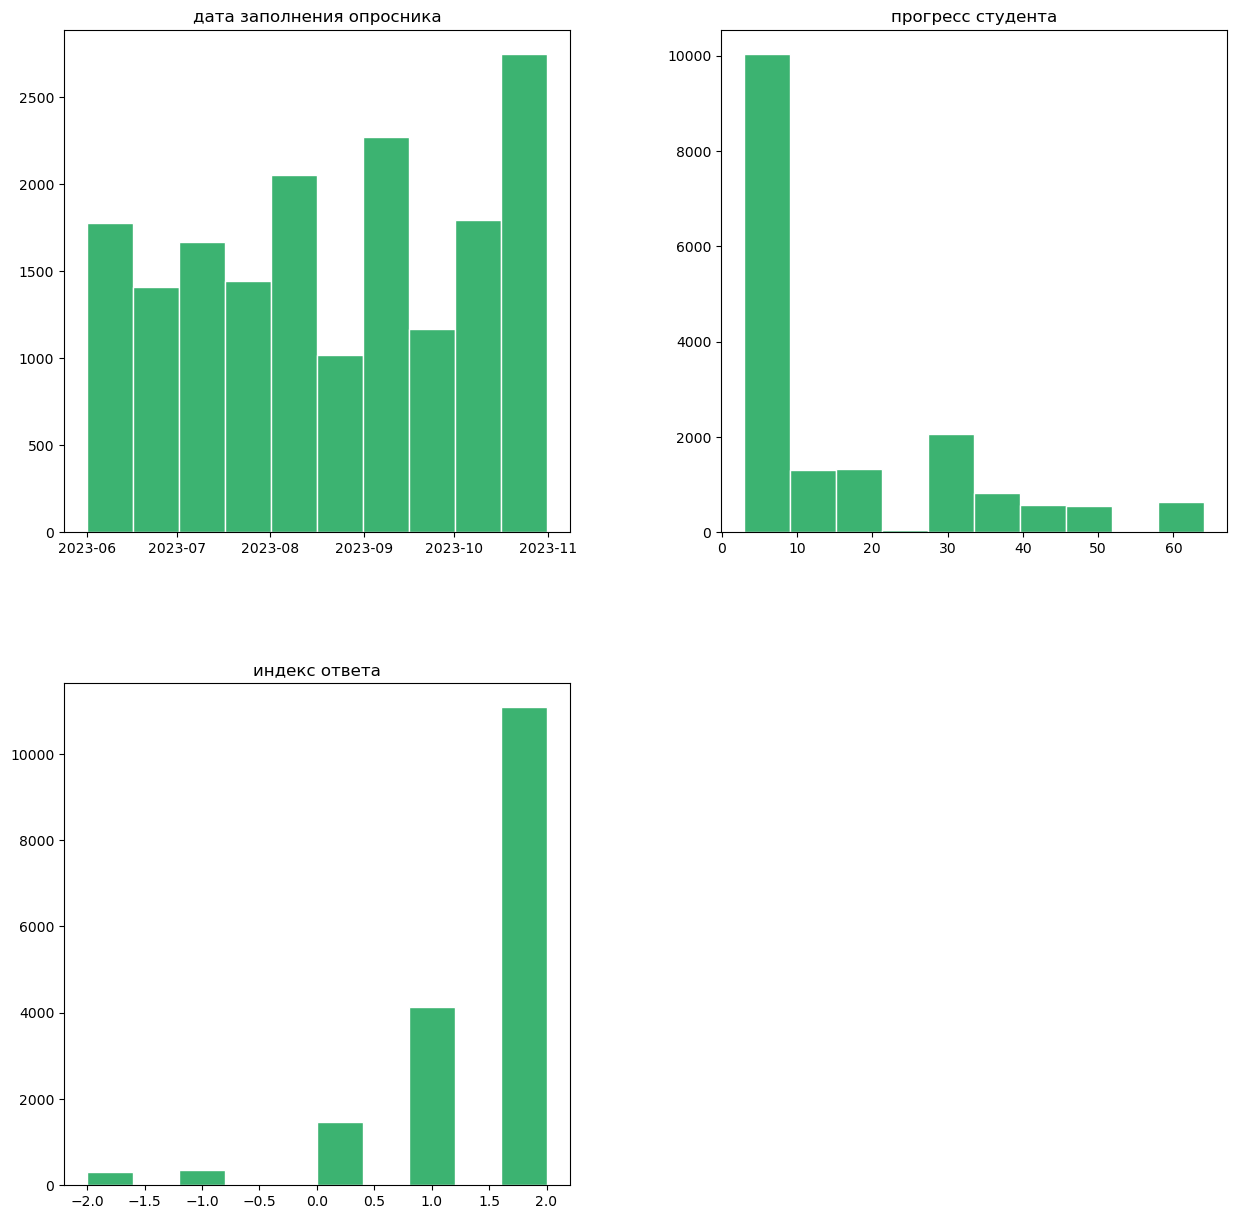

In [29]:
df_char[['date_response', 'sprint_position', 'value']].rename(columns=dict_names).hist(
    figsize=(15, 15), ec='white', color='mediumseagreen', grid=False);

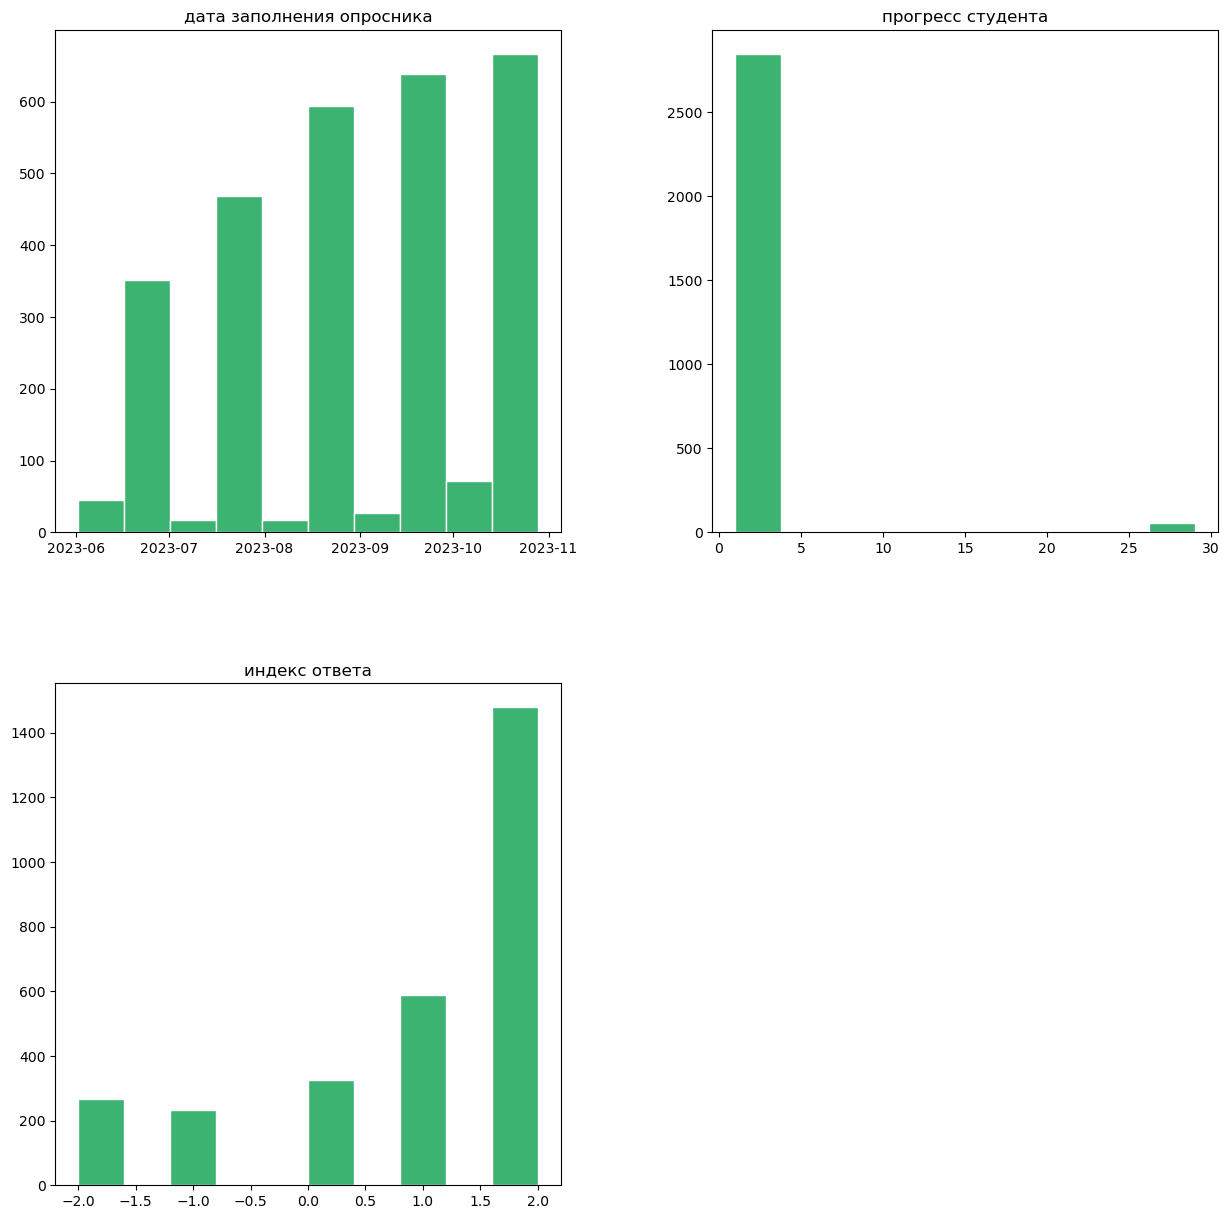

In [30]:
df_goals[['date_response', 'sprint_position', 'value',]].rename(columns=dict_names).hist(
    figsize=(15, 15), ec='white', color='mediumseagreen', grid=False);

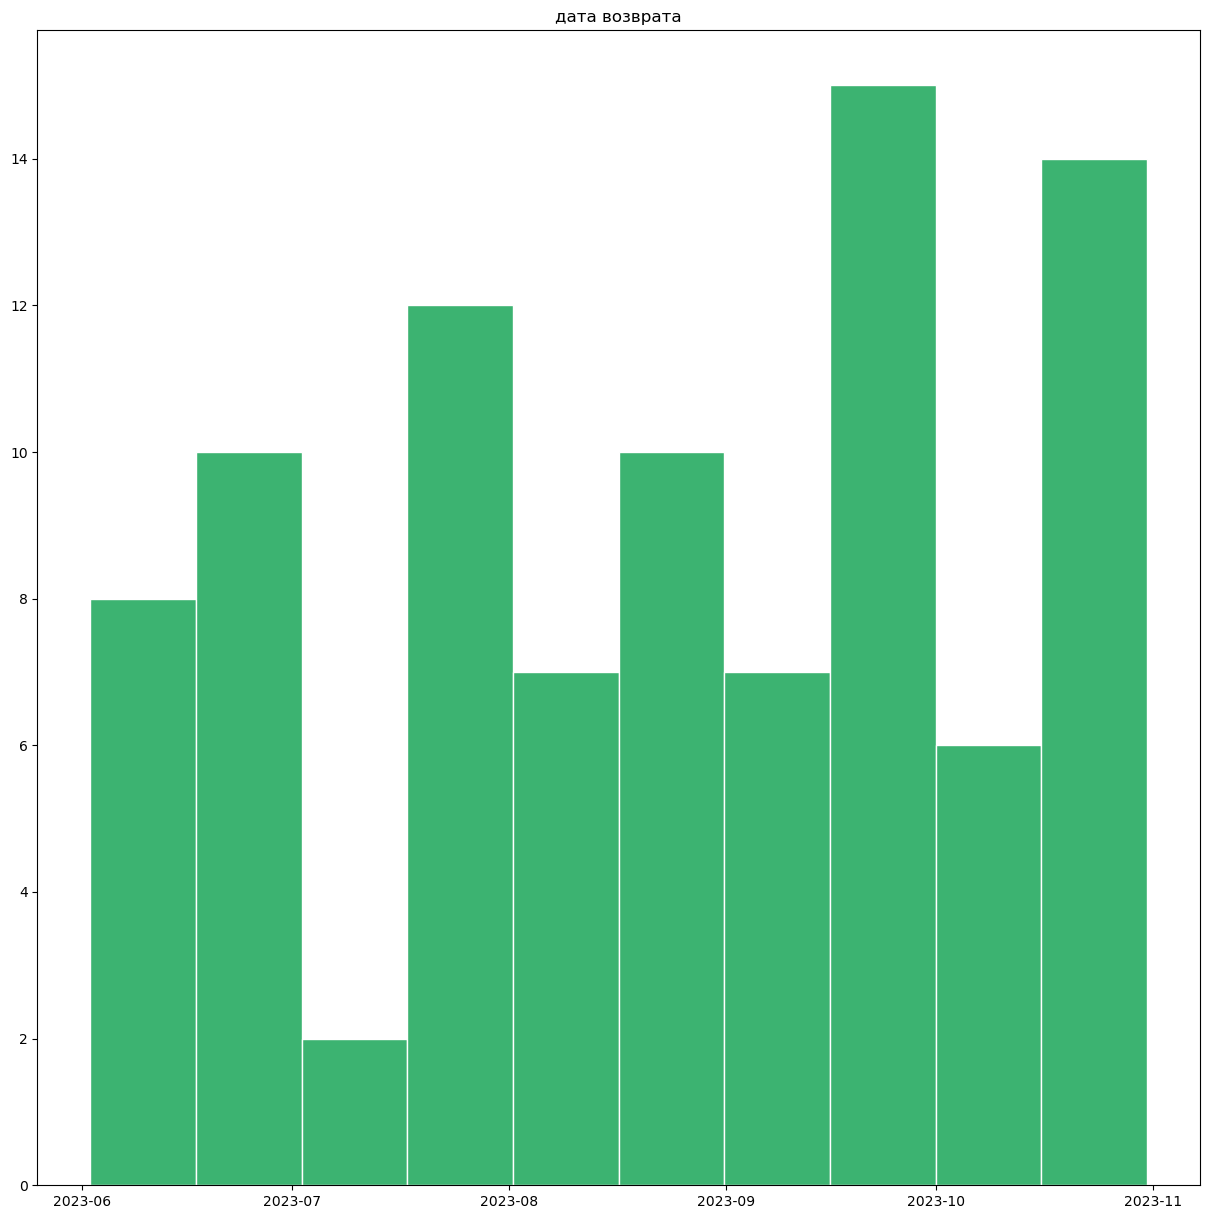

In [31]:
df_returns['churn_date'].to_frame().rename(columns=dict_names).hist(
    figsize=(15, 15), ec='white', color='mediumseagreen', grid=False);

## Есть ли связи между числовыми переменными?

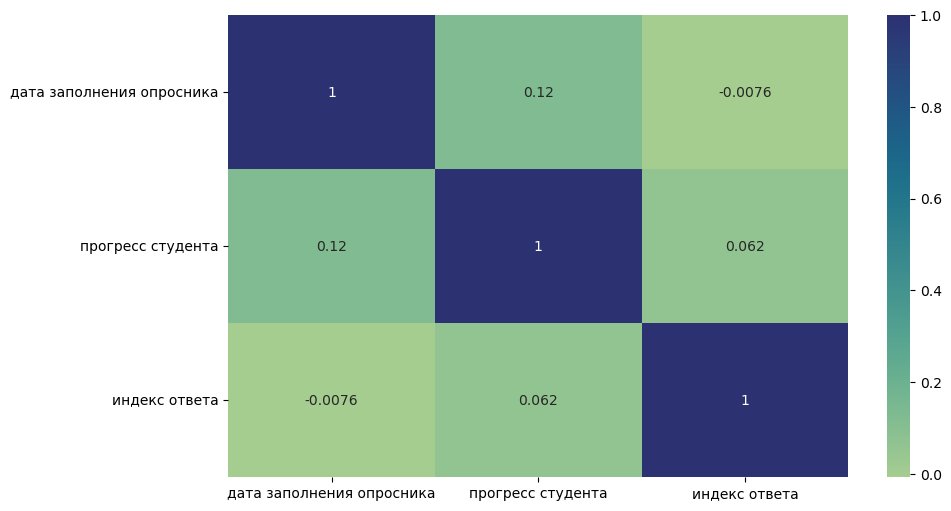

In [32]:
corr_matrix = df_char[['date_response', 'sprint_position', 'value']].rename(
    columns=dict_names).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.xticks(rotation=0)
plt.show()

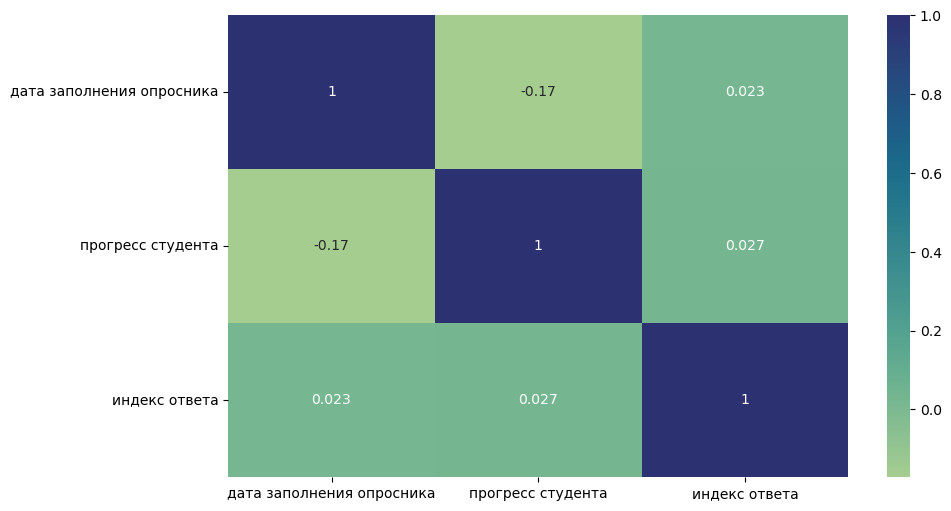

In [33]:
corr_matrix = df_goals[['date_response', 'sprint_position', 'value']].rename(
    columns=dict_names).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.xticks(rotation=0)
plt.show()

## Каким образом наблюдения распределены по значениям категориальных переменных? Есть ли связи между категориальными переменными?

### df_char

In [34]:
df_char.columns

Index(['date_response', 'user_id', 'current_cohort', 'cohort',
       'profession_name', 'sprint_position', 'statement_content',
       'grade_content', 'value', 'question_number', 'measure_num',
       'category_num'],
      dtype='object')

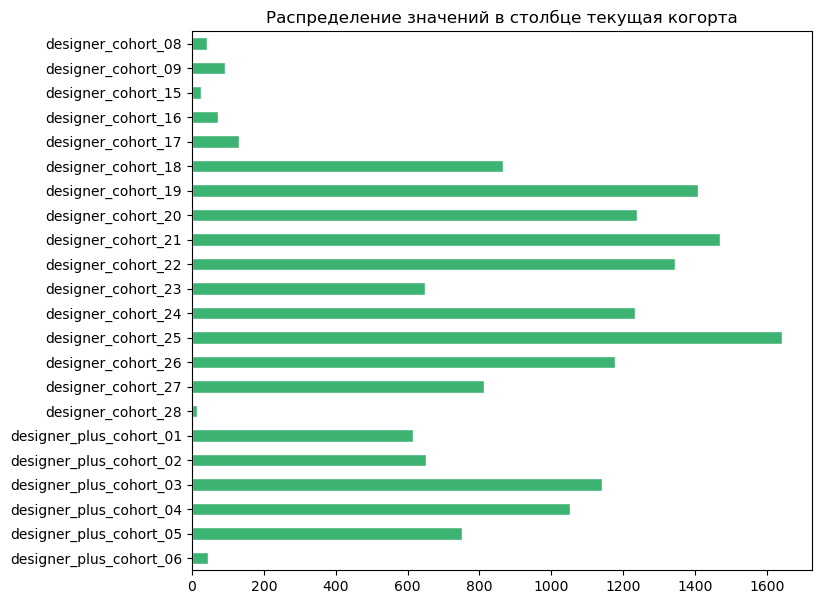

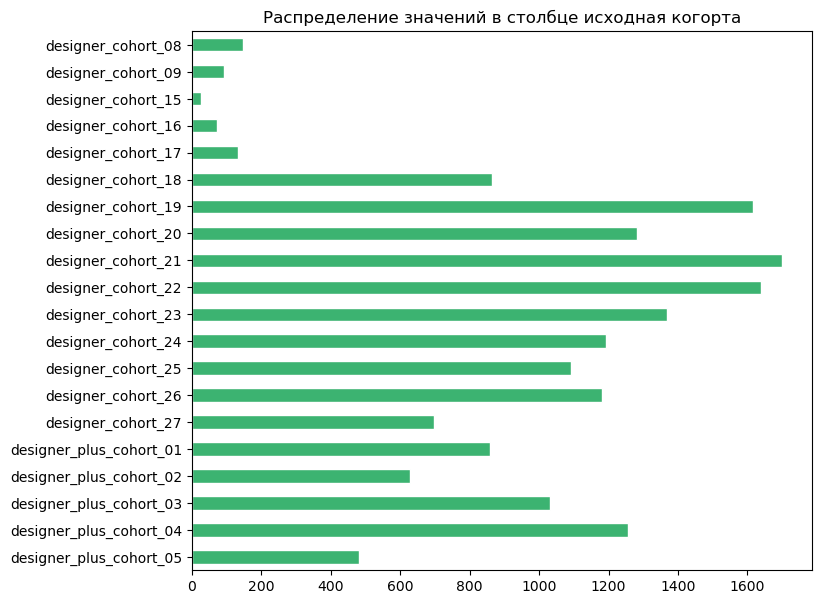

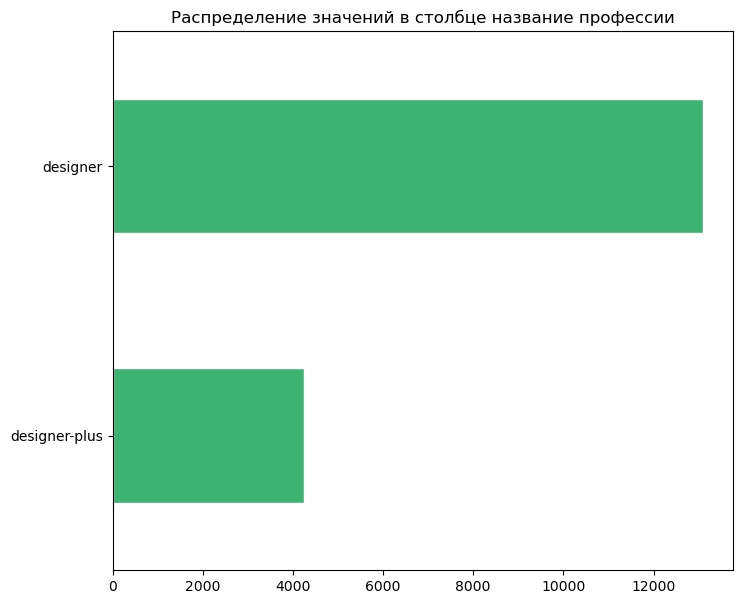

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['current_cohort', 'cohort',
       'profession_name']

# Создаем столбчатые диаграммы для каждого категориального столбца
for column in categorical_columns:
    fig, ax = plt.subplots(figsize=(8, 7))
    # Группируем значения по категориям и суммируем
    grouped_df = df_char.groupby(column)['user_id'].count()
    grouped_df = grouped_df.sort_index(ascending=False)
    
    # Создаем столбчатую диаграмму для столбца 'Value'
    grouped_df.to_frame().rename(columns=dict_names).plot(
        kind='barh', ax=ax, ec='white', color='mediumseagreen', grid=False, legend=False
    )
    
    # Настройка осей и заголовка
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Распределение значений в столбце {dict_names.get(column)}')
    
    # Отображение диаграммы
    plt.show()

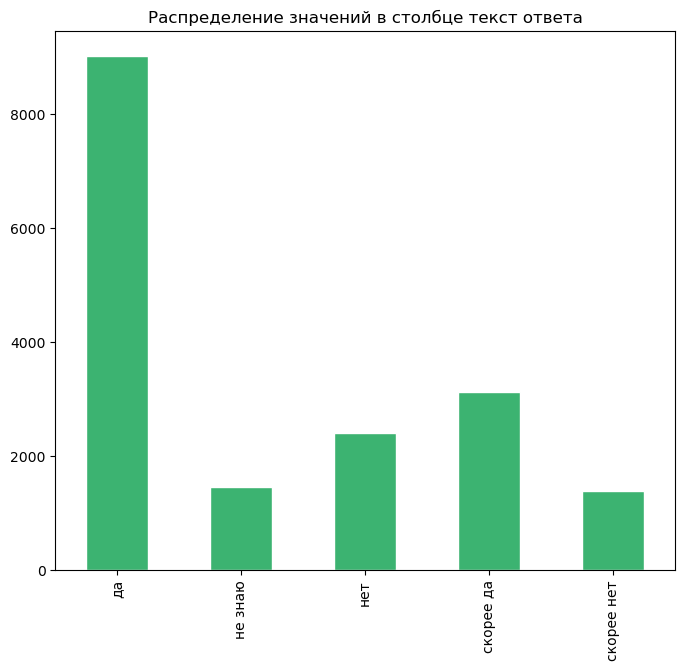

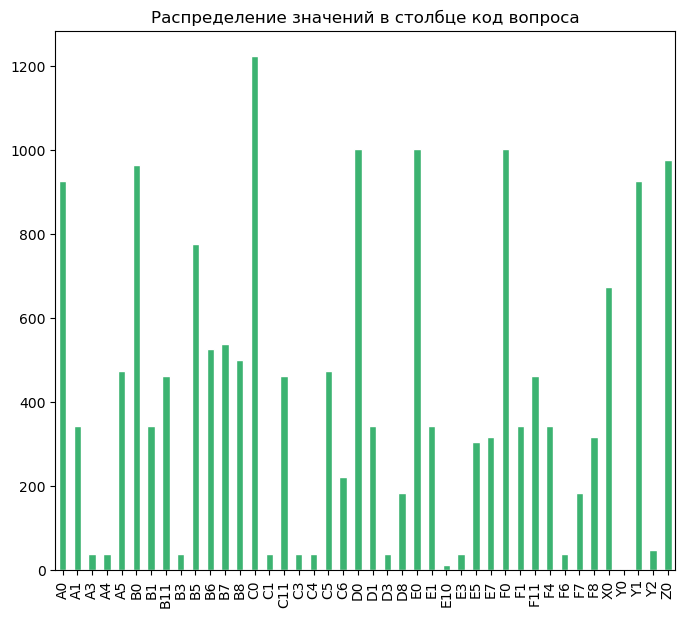

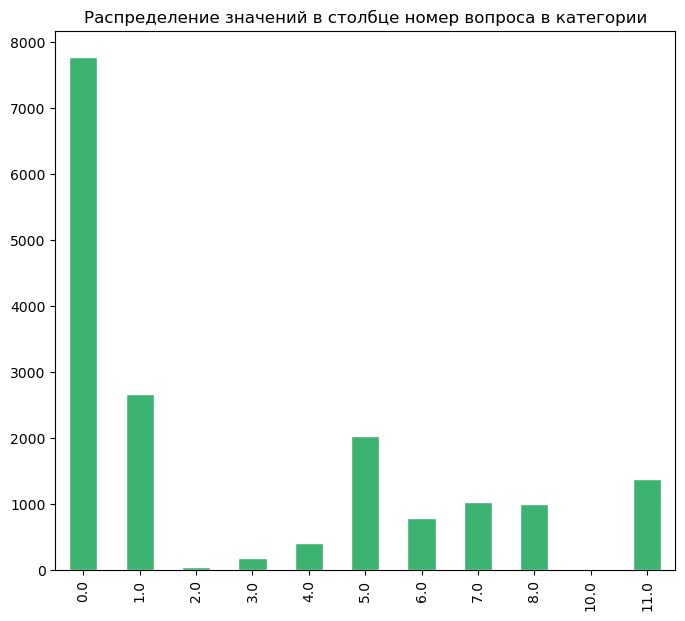

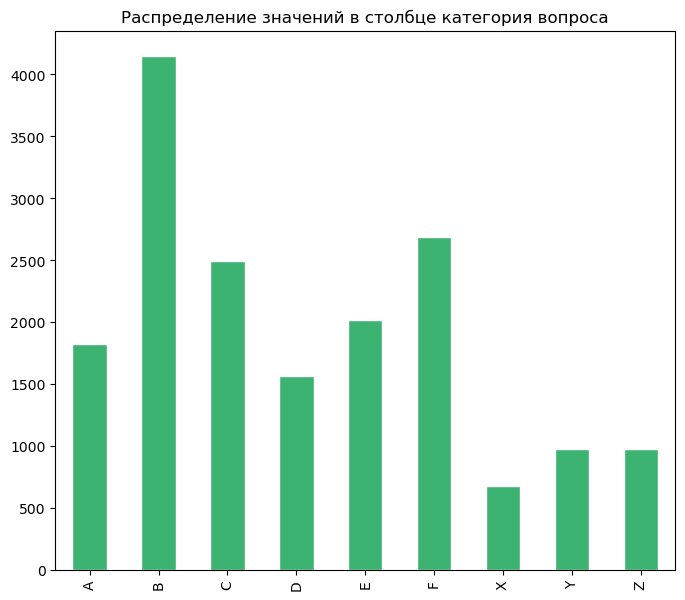

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['grade_content',
       'question_number', 'measure_num', 'category_num',
      ]

# Создаем столбчатые диаграммы для каждого категориального столбца
for column in categorical_columns:
    fig, ax = plt.subplots(figsize=(8, 7))
    # Группируем значения по категориям и суммируем
    grouped_df = df_char.groupby(column)['user_id'].count()
    
    # Создаем столбчатую диаграмму для столбца 'Value'
    grouped_df.to_frame().rename(columns=dict_names).plot(
        kind='bar', ax=ax, ec='white', color='mediumseagreen', grid=False, legend=False
    )
    grouped_df = grouped_df.sort_index(ascending=False)
    
    # Настройка осей и заголовка
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Распределение значений в столбце {dict_names.get(column)}')
    #plt.box(False)
    # Отображение диаграммы
    plt.show()

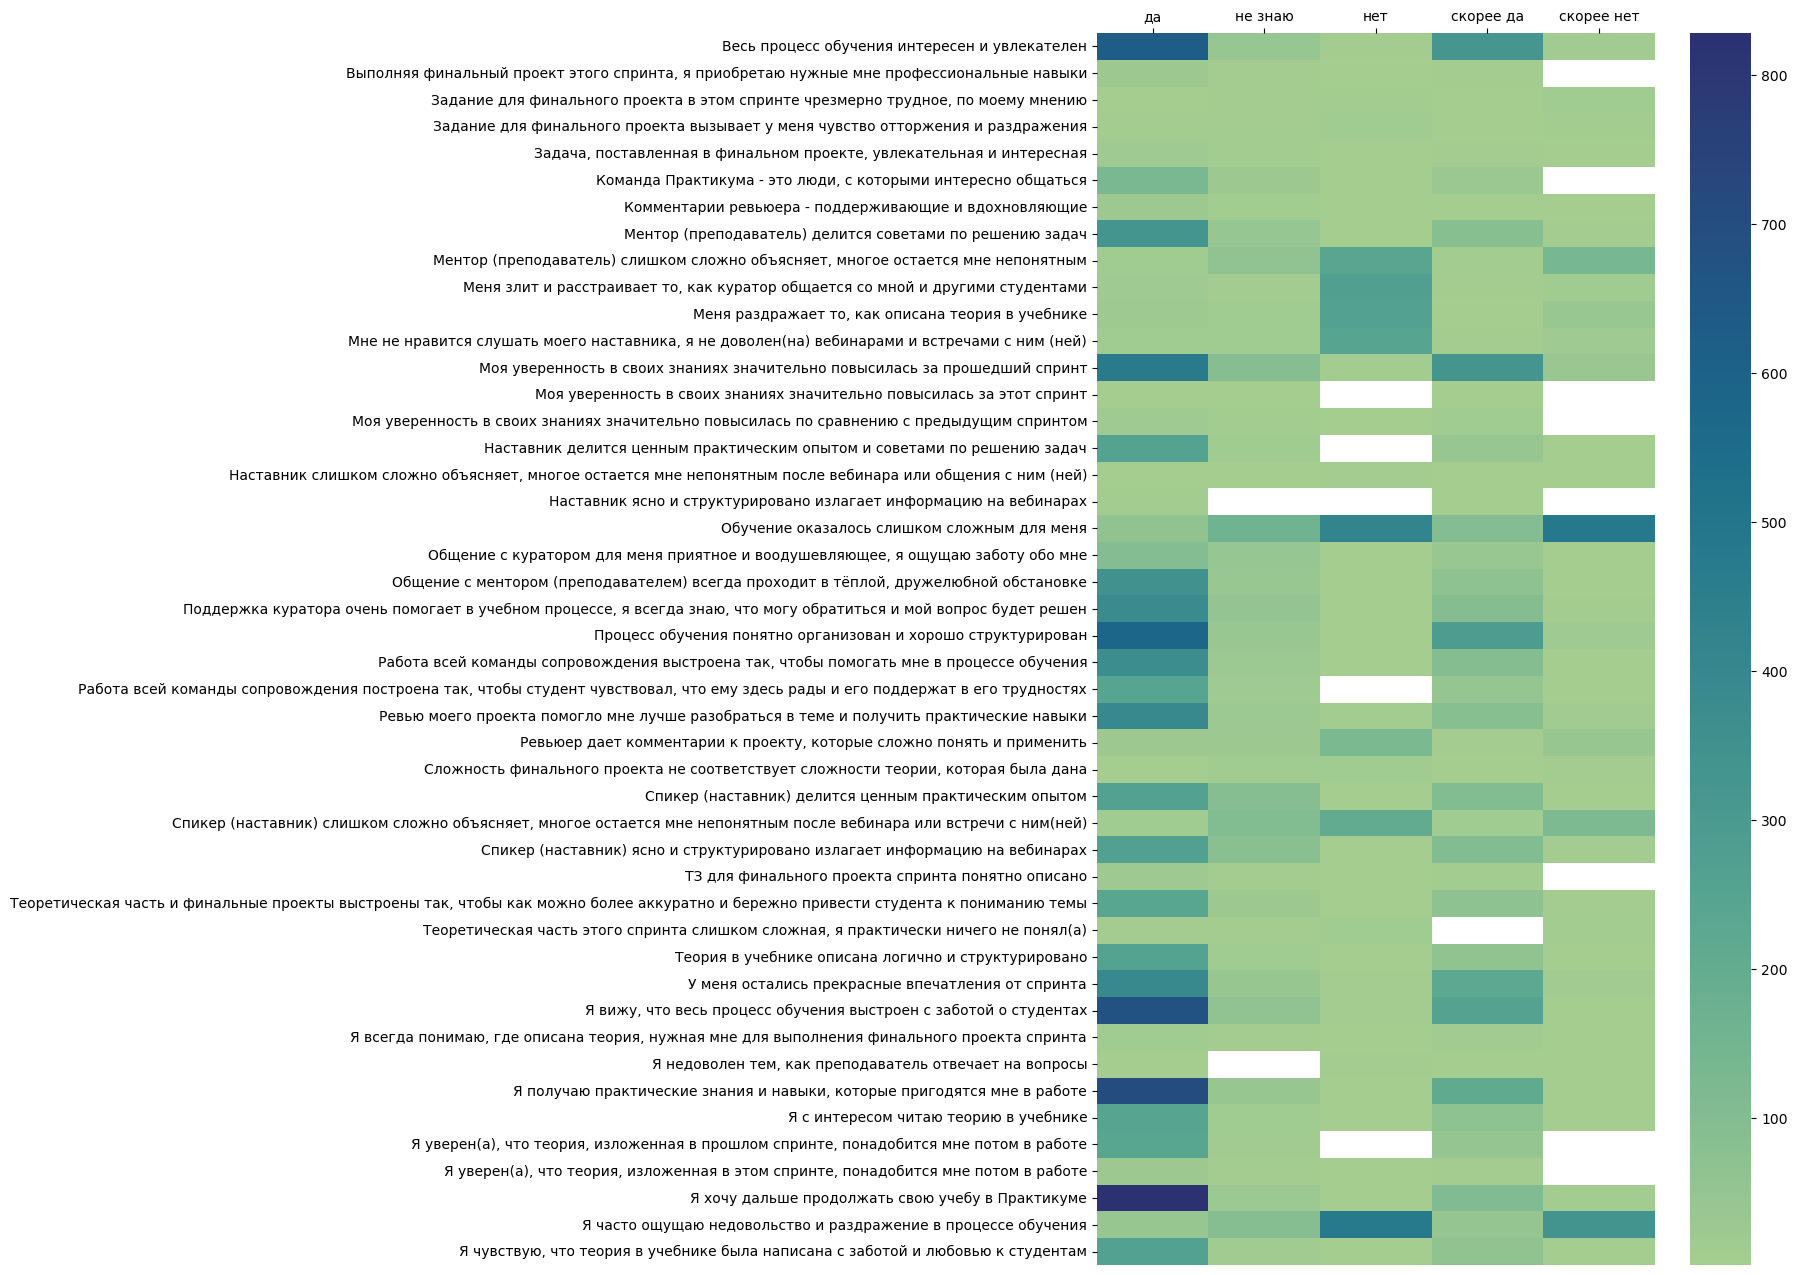

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем значения по категориям и суммируем
grouped_df = df_char.groupby(['statement_content', 'grade_content'])['user_id'].count()
grouped_df = grouped_df.sort_index(ascending=False).unstack()

plt.figure(figsize=(9, 16))
# Создаем тепловую карту (heatmap) с помощью seaborn
ax = sns.heatmap(grouped_df, annot=False, cmap="crest", square=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [38]:
df_goals.columns

Index(['date_response', 'user_id', 'current_cohort', 'cohort',
       'profession_name', 'course_name', 'topic_name', 'sprint_position',
       'lesson_name', 'statement_content', 'grade_content', 'value'],
      dtype='object')

### df_goals

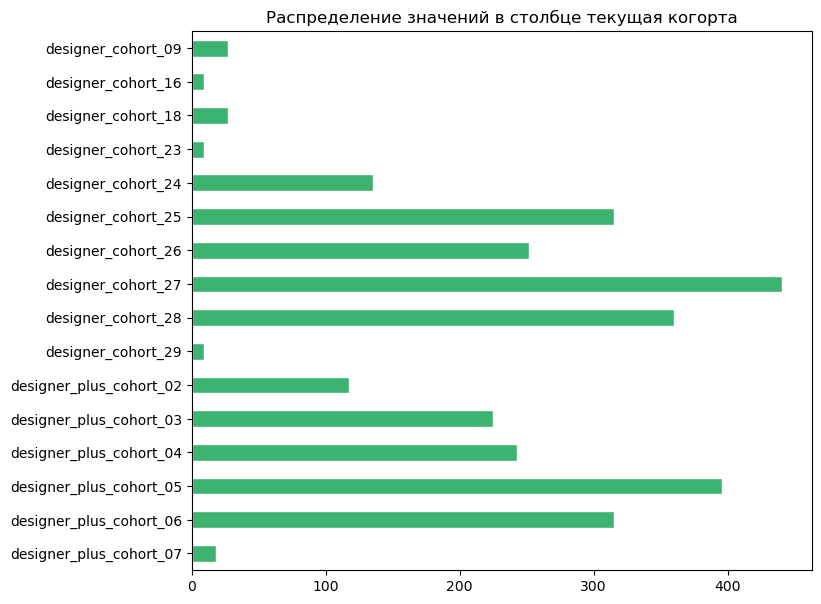

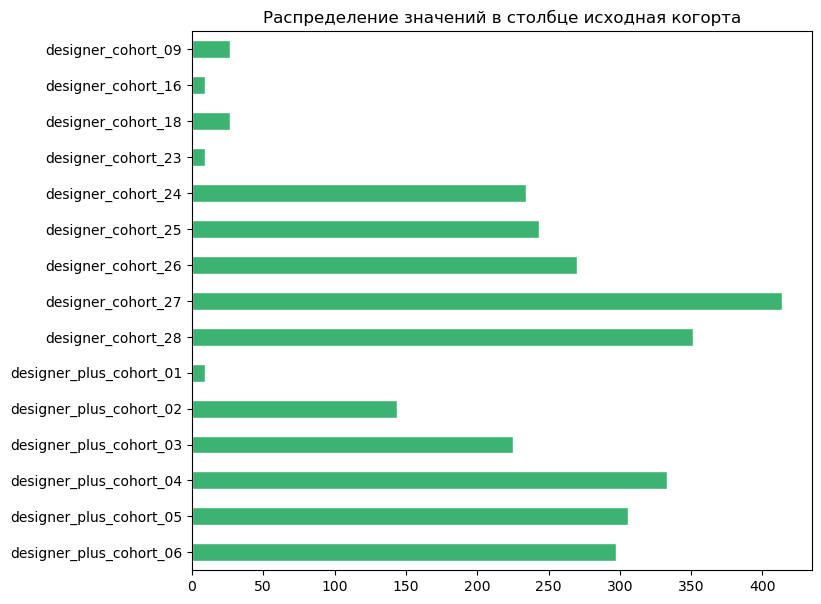

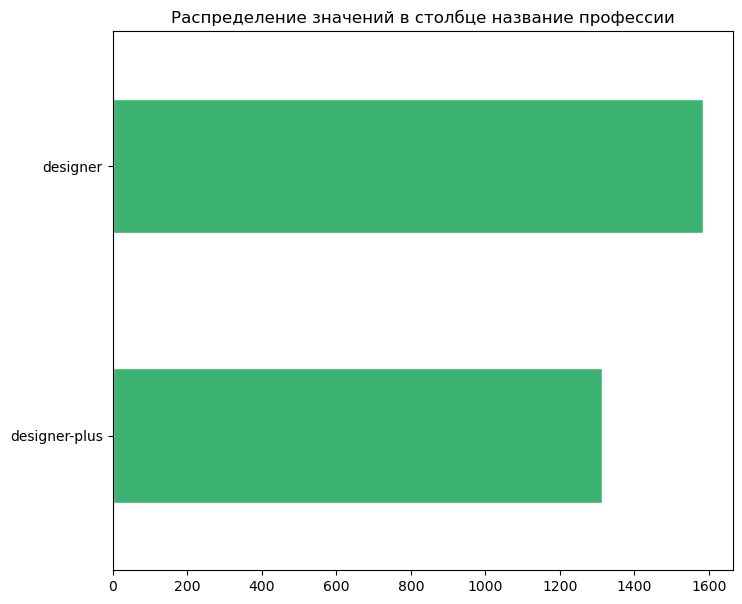

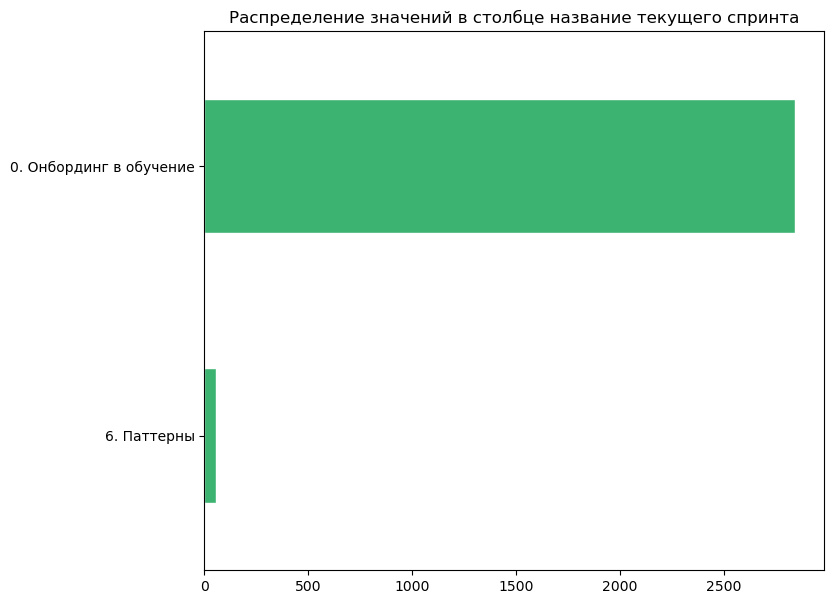

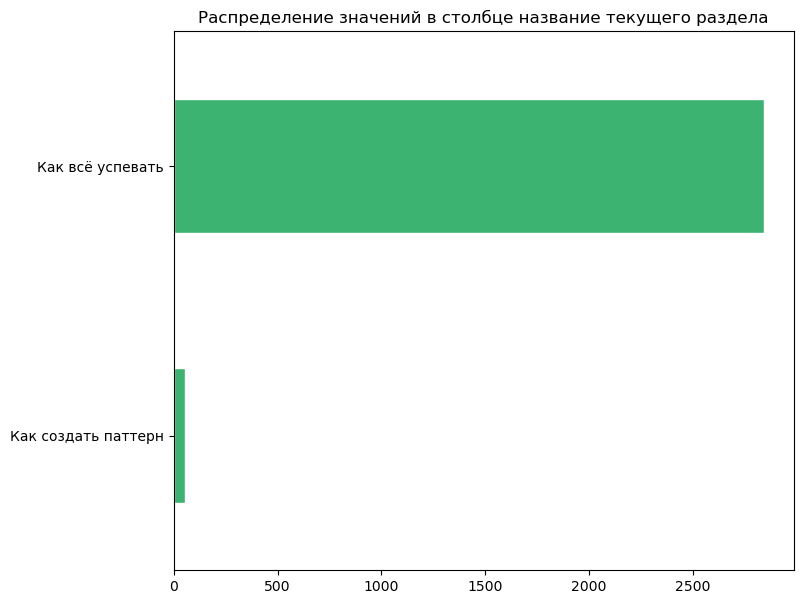

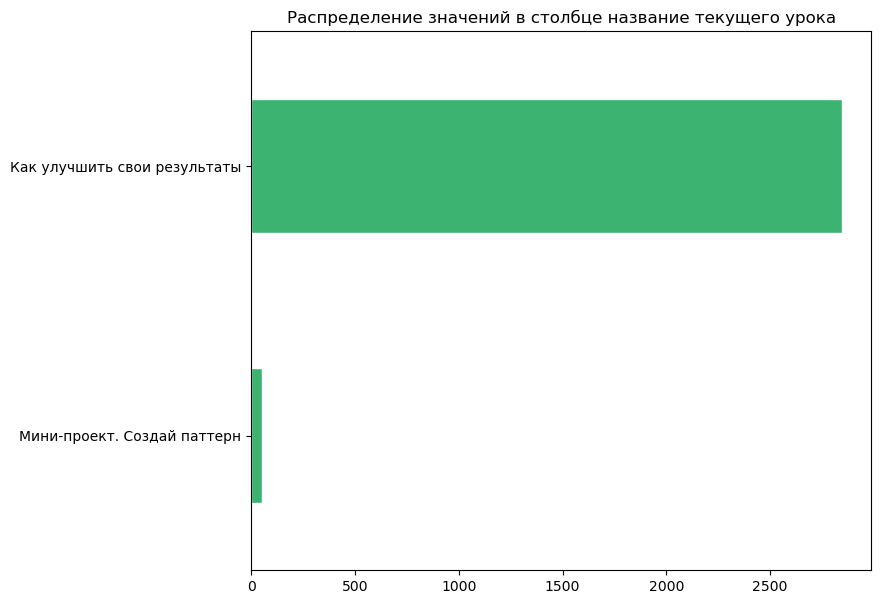

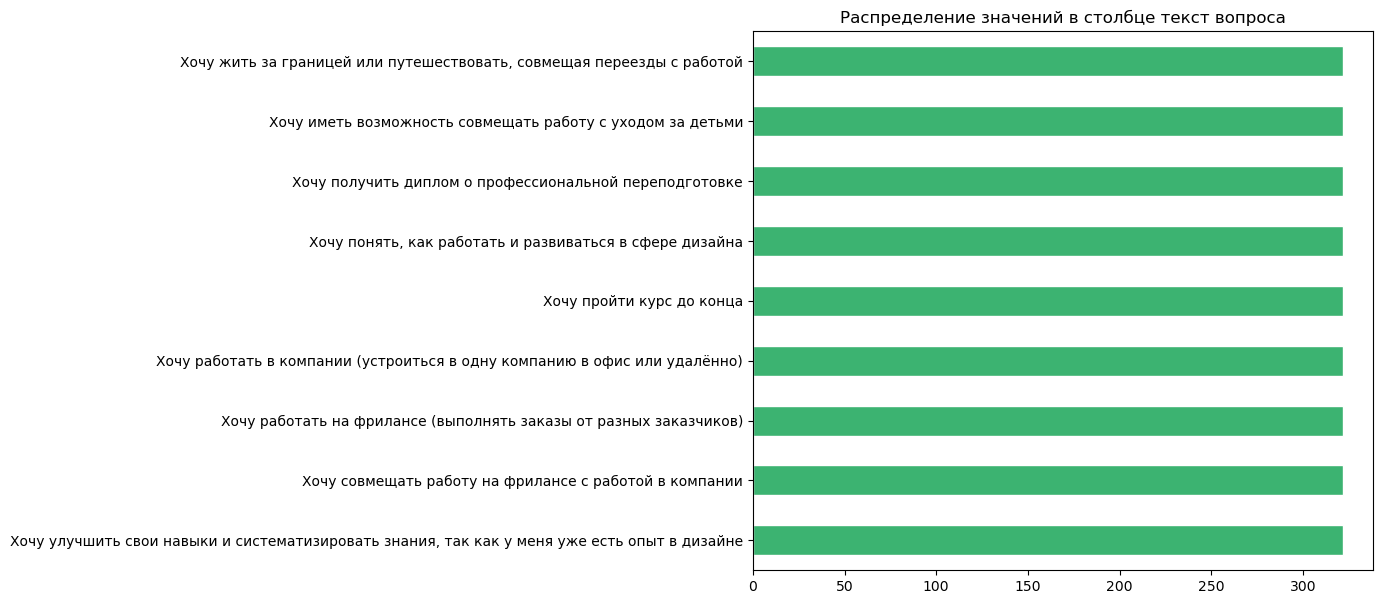

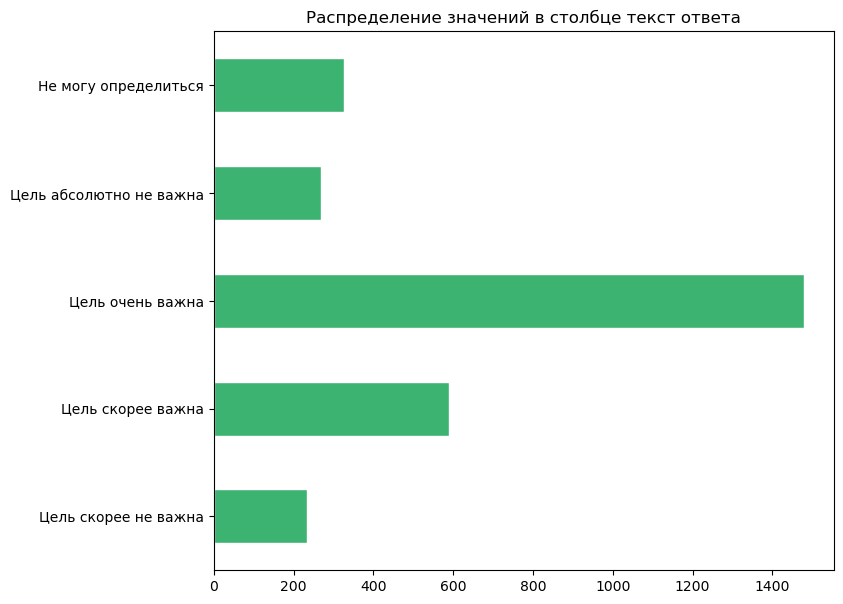

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['current_cohort', 'cohort', 'profession_name',
                       'course_name', 'topic_name','lesson_name', 
                       'statement_content', 'grade_content']

# Создаем столбчатые диаграммы для каждого категориального столбца
for column in categorical_columns:
    fig, ax = plt.subplots(figsize=(8, 7))
    # Группируем значения по категориям и суммируем
    grouped_df = df_goals.groupby(column)['user_id'].count()
    grouped_df = grouped_df.sort_index(ascending=False)
    
    # Создаем столбчатую диаграмму для столбца 'Value'
    grouped_df.to_frame().rename(columns=dict_names).plot(
        kind='barh', ax=ax, ec='white', color='mediumseagreen', grid=False, legend=False
    )
    
    # Настройка осей и заголовка
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Распределение значений в столбце {dict_names.get(column)}')
    
    # Отображение диаграммы
    plt.show()

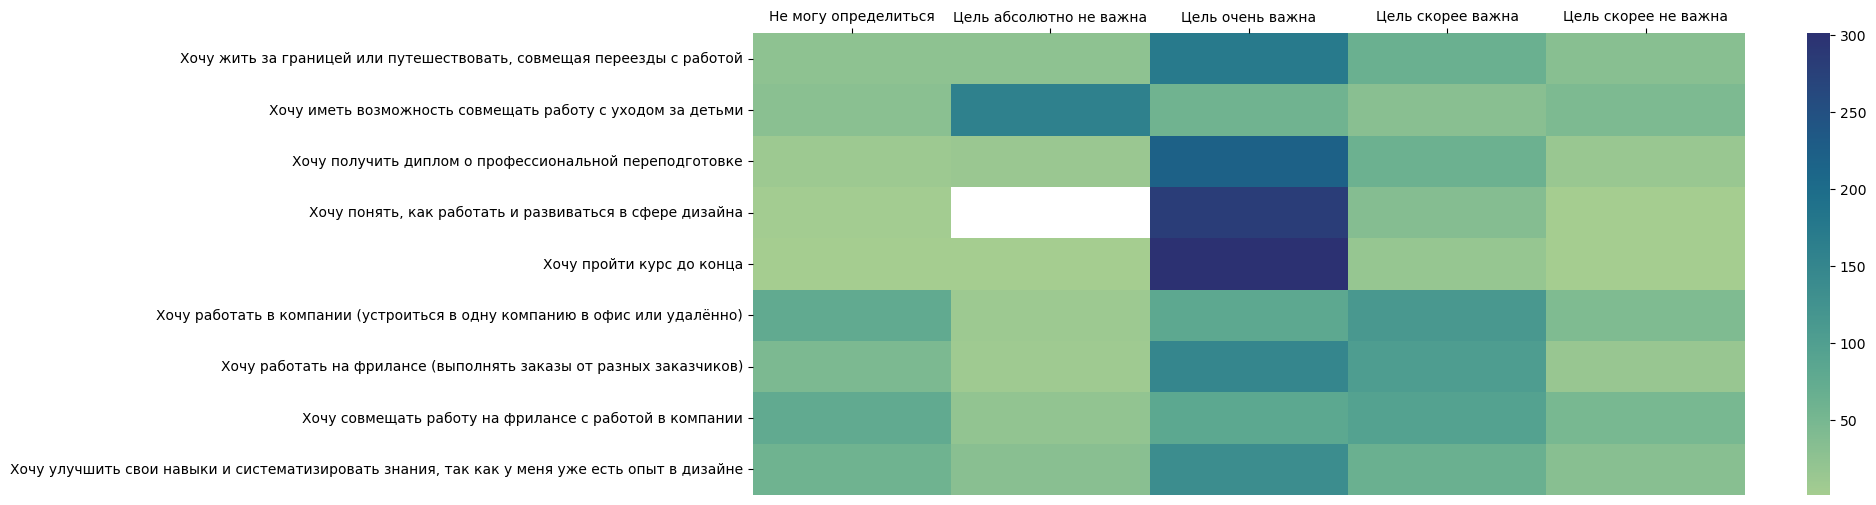

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем значения по категориям и суммируем
grouped_df = df_goals.groupby(['statement_content', 'grade_content'])['user_id'].count()
grouped_df = grouped_df.sort_index(ascending=False).unstack()

plt.figure(figsize=(16, 6))
# Создаем тепловую карту (heatmap) с помощью seaborn
ax = sns.heatmap(grouped_df, annot=False, cmap="crest", square=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

### df_returns

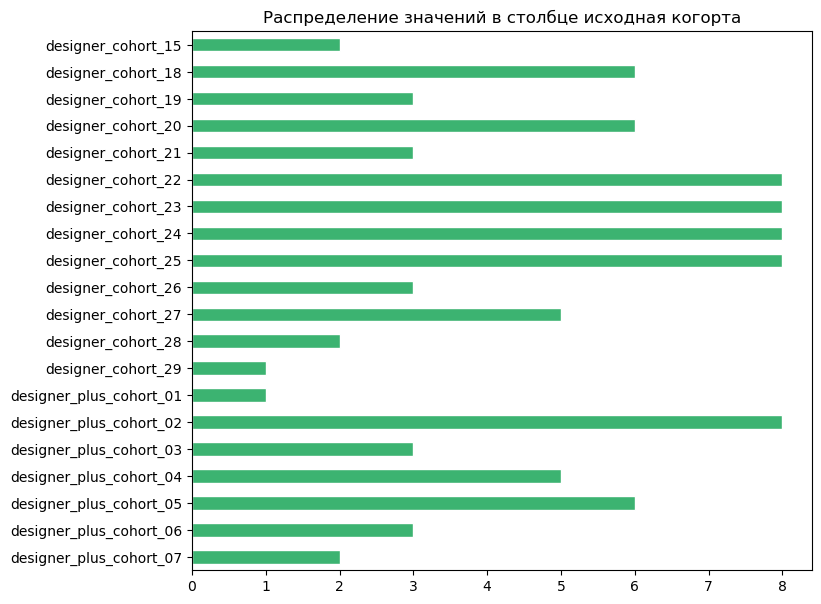

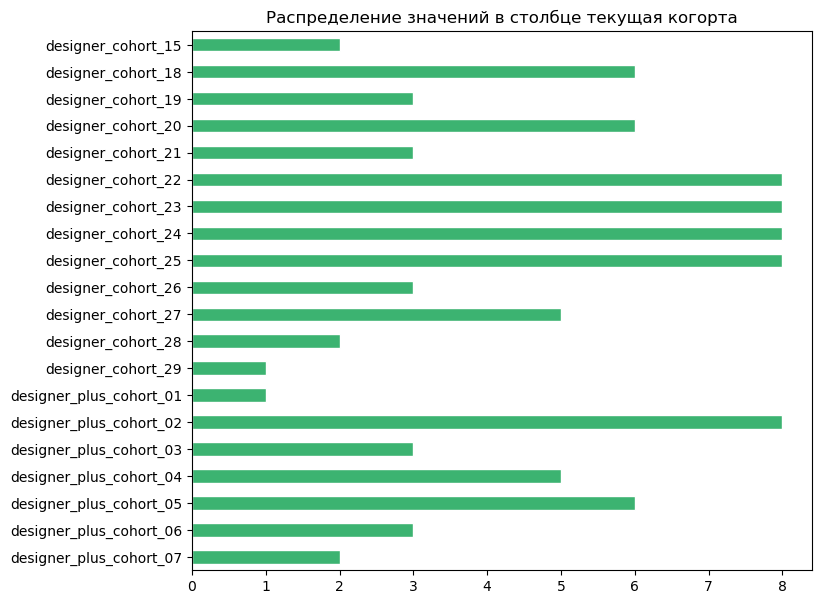

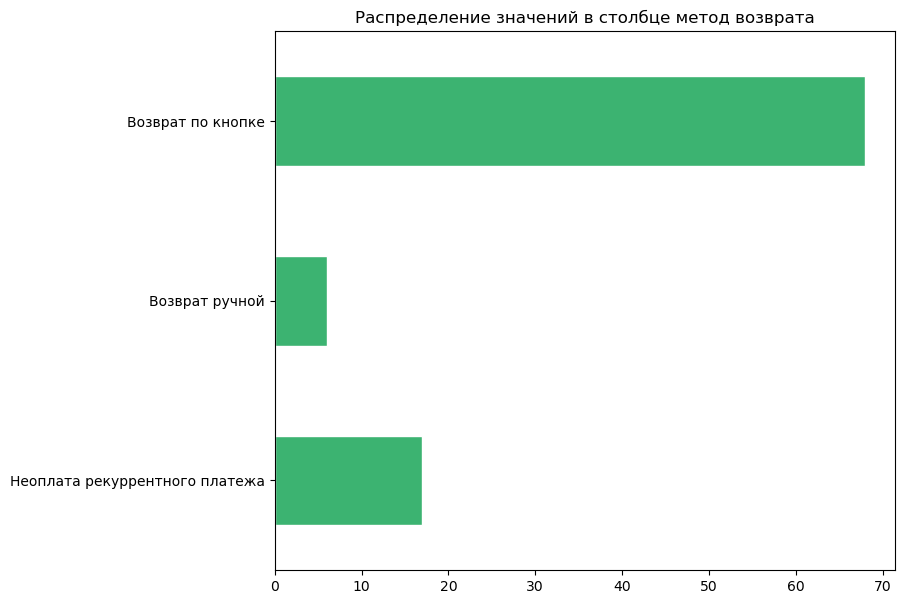

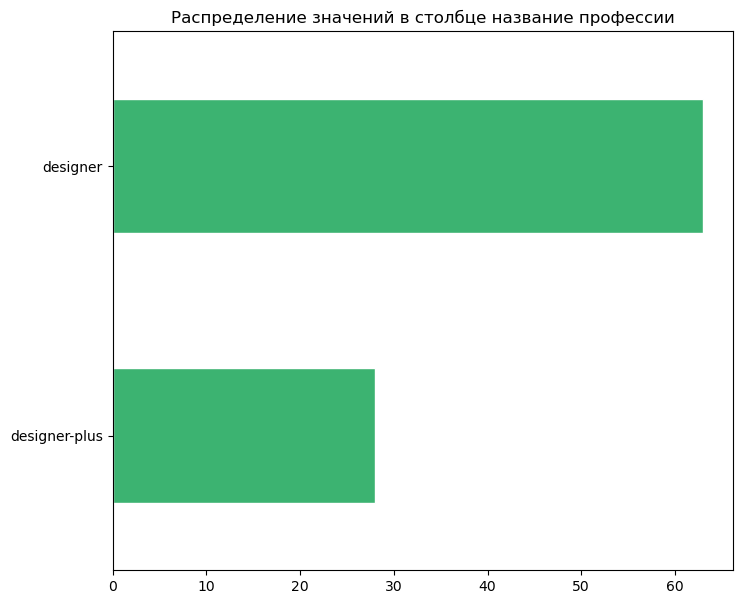

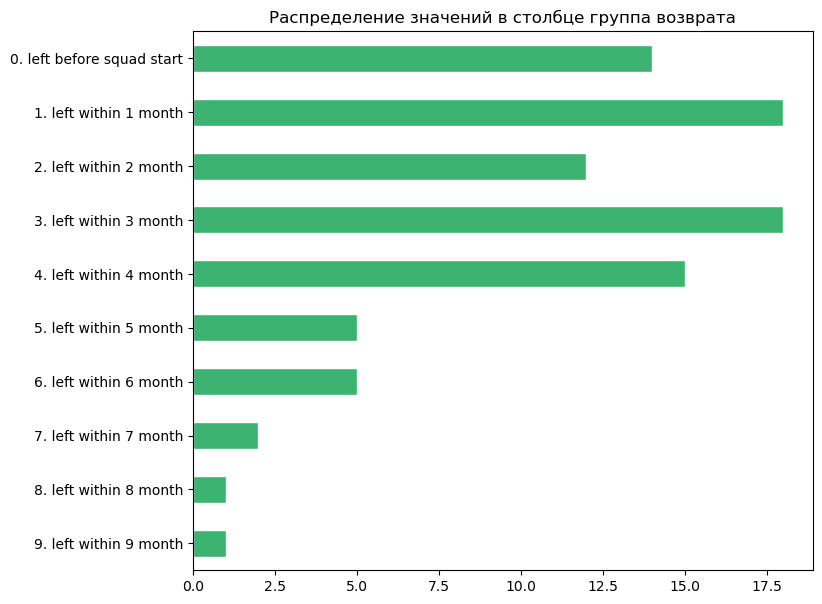

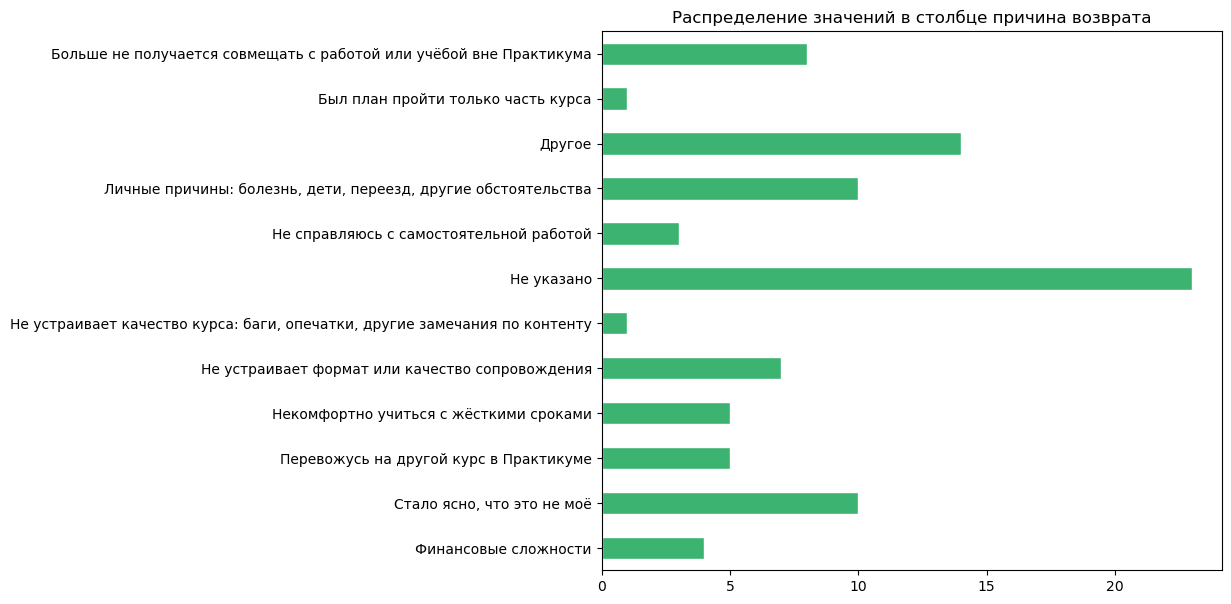

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['cohort', 'current_cohort',
       'churn_type', 'profession_name', 'churn_group', 'refund_reason']

# Создаем столбчатые диаграммы для каждого категориального столбца
for column in categorical_columns:
    fig, ax = plt.subplots(figsize=(8, 7))
    # Группируем значения по категориям и суммируем
    grouped_df = df_returns.groupby(column)['user_id'].count()
    grouped_df = grouped_df.sort_index(ascending=False)
    
    # Создаем столбчатую диаграмму для столбца 'Value'
    grouped_df.to_frame().rename(columns=dict_names).plot(
        kind='barh', ax=ax, ec='white', color='mediumseagreen', grid=False, legend=False
    )
    
    # Настройка осей и заголовка
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Распределение значений в столбце {dict_names.get(column)}')
    
    # Отображение диаграммы
    plt.show()

<a class="anchor" id="research"></a>
# Решение задачи бизнеса


### Задача
Изучить, есть ли закономерности между тем, какие цели ставят студенты и по каким причинам они бросают обучение.

[К оглавлению](#toc)

- Выясним, какие пользователи ставят цели - возможно, они более или менее довольны образовательным процессом сами по себе
- Объединим таблицы: к таблице “Цели” добавим данные об образовательных характеристиках и возвратах
- Выявим среднее время возврата после начала курса, чтобы удалить из анализа тех, кто ещё не сделал возврат, но возможно, что скоро сделает
- Сравним, какие цели ставят перед собой те, кто оформляет возврат и те, кто не оформляет возврат


### Определим удовлетворённость студентов
В таблице "Образовательные характеристики" в столбце `statement_content` есть утверждения, с которыми студентам предлагается согласиться или не согласиться и таким образом показать свою удовлетворённость разными аспектами курса. Однако, утверждений очень много, и их нужно классифицировать на положительные и отрицательные. Пример положительного утверждения - *"Команда Практикума - это люди, с которыми интересно общаться"*. Пример отрицательного утверждения - *"Ментор (преподаватель) слишком сложно объясняет, многое остается мне непонятным"*


Мы разделим утверждения на положительные и отрицательные, значения оценок из `grade_content` приведём к числовому виду ("да" = 2, "скорее да" = 1, "не знаю" = 0, "скорее нет" = -1, "нет" = -2) и посчитаем среднюю удовлетворённость по тем, кто ставил цели, и по тем, кто не ставил, по формуле:

$$ S = \frac{\sum^n_{i=1}g_{positive}}{n} - \frac{\sum^m_{i=1}g_{negative}}{m}  $$

где S = удовлетворённость студента, n = количество "позитивных" утверждений, m = количество "негативных" утверждений студента, g = оценка студентом (да, нет и т. д.)

Затем агрегируем данные по группам (ставил цели, не ставил цели, оформил возврат, не оформил возврат), найдя среднюю оценку в группе.

In [42]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 9999)

In [43]:
df_question_number = df_char.groupby(
    ['statement_content', 'question_number']
    ).agg({'user_id':'max'}).reset_index()
df_question_number = df_question_number[['statement_content', 'question_number']]
df_question_number

,statement_content,question_number
0,Весь процесс обучения интересен и увлекателен,D0
1,"Выполняя финальный проект этого спринта, я приобретаю нужные мне профессиональные навыки",B3
2,"Задание для финального проекта в этом спринте чрезмерно трудное, по моему мнению",C3
3,Задание для финального проекта вызывает у меня чувство отторжения и раздражения,E3
4,"Задача, поставленная в финальном проекте, увлекательная и интересная",D3
5,"Команда Практикума - это люди, с которыми интересно общаться",D8
6,Комментарии ревьюера - поддерживающие и вдохновляющие,F6
7,Ментор (преподаватель) делится советами по решению задач,B11
8,"Ментор (преподаватель) слишком сложно объясняет, многое остается мне непонятным",C11
9,"Меня злит и расстраивает то, как куратор общается со мной и другими студентами",E7


In [44]:
positive_statements = ['D0', 'B3', 'D3', 'D8', 'F6', 'B11', 'Y1', 'Y0', 'Y2', 'B5',
                        'A5', 'F7', 'F11', 'B7', 'A0', 'B8', 'F8', 'B6', 'B5', 'A3',
                        'F4', 'A1', 'X0', 'F0', 'A4', 'B0', 'D1', 'B1', 'Z0', 'F1']

negative_statements = ['C3', 'E3', 'C11', 'E7', 'E1', 'E5', 'C5', 'C0', 'C6', 'C4',
                        'C1', 'E10', 'E0']

В данных есть дубликаты (у разных вопросов есть один и тот же индекс), но это не повлияет на результат (далее мы будем использовать группировку по statements):

In [45]:
common_values = list(set(positive_statements) & set(negative_statements))
print(common_values)

[]


In [46]:
def categorize_statements(statement):
    try:
        if statement in positive_statements:
            return 'positive'
        elif statement in negative_statements:
            return 'negative'
    except:
        pass
    
df_char['statement_category'] = df_char['question_number'].apply(categorize_statements)
df_char['statement_category'].unique()

array(['negative', 'positive'], dtype=object)

In [47]:
df_char['grade_content'].unique()

array(['нет', 'да', 'скорее да', 'скорее нет', 'не знаю'], dtype=object)

In [48]:
def categorize_answers(answer):
    try:
        if answer == 'да':
            return 2
        elif answer == 'скорее да':
            return 1
        elif answer == 'скорее нет':
            return -1
        elif answer == 'нет':
            return -2
        elif answer == 'не знаю':
            return 0
    except:
        pass
    
df_char['grade_category'] = df_char['grade_content'].apply(categorize_answers)
df_char['grade_category'].unique()

array([-2,  2,  1, -1,  0])

In [49]:
df_char.head()

,date_response,user_id,current_cohort,cohort,profession_name,sprint_position,statement_content,grade_content,value,question_number,measure_num,category_num,statement_category,grade_category
0,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,"Мне не нравится слушать моего наставника, я не доволен(на) вебинарами и встречами с ним (ней)",нет,2,E5,5.0,E,negative,-2
1,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,"Работа всей команды сопровождения выстроена так, чтобы помогать мне в процессе обучения",да,2,B8,8.0,B,positive,2
2,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,"Я получаю практические знания и навыки, которые пригодятся мне в работе",да,2,B0,0.0,B,positive,2
3,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Весь процесс обучения интересен и увлекателен,да,2,D0,0.0,D,positive,2
4,2023-06-01 02:52:18,2550970,designer_cohort_20,designer_cohort_19,designer,20.0,Я хочу дальше продолжать свою учебу в Практикуме,да,2,Z0,0.0,Z,positive,2


#### Средняя удовлетворённость по всей таблице

In [56]:
df_char_pos = (df_char[df_char['statement_category']=='positive']
               .groupby(['user_id', 'profession_name']).agg({'grade_category':'sum'})
               .reset_index())

df_char_neg = (df_char[df_char['statement_category']=='negative']
               .groupby(['user_id', 'profession_name']).agg({'grade_category':'sum'})
               .reset_index())

df_char_grade = df_char_pos.merge(
    df_char_neg,
    how='outer',
    on=['user_id', 'profession_name'],
    suffixes=['_positive', '_negative']
)
df_char_grade['grade'] = (df_char_grade['grade_category_positive']
                          - df_char_grade['grade_category_negative'])
print('all')
print(df_char_grade['grade'].describe())
df_char_grade['is_in_goals'] = df_char_grade['user_id'].isin(df_goals['user_id'])
df_char_grade['is_in_returns'] = df_char_grade['user_id'].isin(df_returns['user_id'])
print('')
print('is_in_goals')
print(df_char_grade[df_char_grade['is_in_goals']==True]['grade'].describe())
print('')
print('is_in_returns')
print(df_char_grade[df_char_grade['is_in_returns']==True]['grade'].describe())

all
count    466.000000
mean      54.369099
std       44.519816
min      -18.000000
25%       23.000000
50%       42.000000
75%       76.000000
max      251.000000
Name: grade, dtype: float64

is_in_goals
count    230.000000
mean      46.143478
std       26.864065
min       -7.000000
25%       22.000000
50%       43.000000
75%       72.000000
max       92.000000
Name: grade, dtype: float64

is_in_returns
count    31.000000
mean     33.354839
std      24.298900
min     -18.000000
25%      22.000000
50%      31.000000
75%      49.500000
max      82.000000
Name: grade, dtype: float64


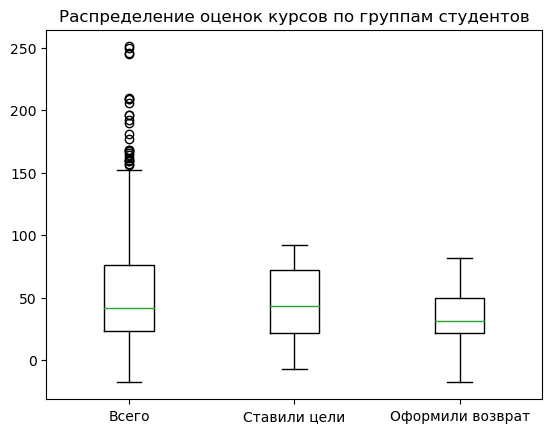

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем три pandas series
series1 = df_char_grade['grade']
series2 = df_char_grade[df_char_grade['is_in_goals']==True]['grade']
series3 = df_char_grade[df_char_grade['is_in_returns']==True]['grade']

# Соединяем series в один DataFrame
data = pd.DataFrame(
    {'Всего': series1, 'Ставили цели': series2, 'Оформили возврат': series3}
)

# Создаем график с тремя boxplot
fig, ax = plt.subplots()
data.boxplot(
    column=list(data.columns),
    ax=ax,
    grid=False,
    color=dict(boxes='black', whiskers='black', caps='black'),
)

# Добавляем названия осей и заголовок
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Распределение оценок курсов по группам студентов')

# Отображаем график
plt.show()

#### Вывод
Гипотеза не подтвердилась: студенты, которые ставили цели, в среднем оценивают курс так же, как и все остальные.
Студенты, оформившие возврат, ожидаемо оценивают курс ниже.

### Посмотрим распределение оценок по курсам

In [62]:
print('designer')
print(df_char_grade[df_char_grade['profession_name']=='designer']['grade'].describe())
print('')
print('designer-plus')
print(df_char_grade[df_char_grade['profession_name']=='designer-plus']['grade'].describe())

designer
count    344.000000
mean      56.095930
std       49.210674
min      -18.000000
25%       22.000000
50%       41.500000
75%       76.250000
max      251.000000
Name: grade, dtype: float64

designer-plus
count    122.000000
mean      49.500000
std       26.826424
min       -1.000000
25%       24.250000
50%       50.500000
75%       73.000000
max       95.000000
Name: grade, dtype: float64


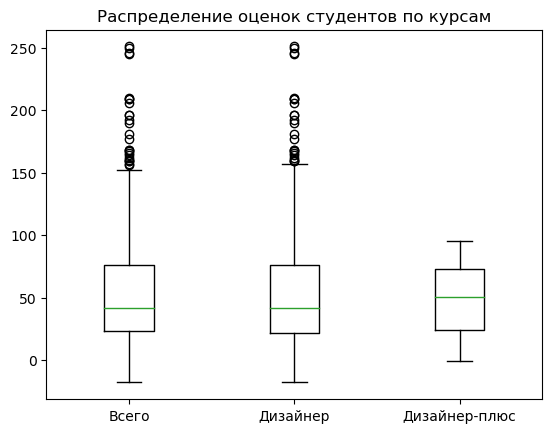

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем три pandas series
series1 = df_char_grade['grade']
series2 = df_char_grade[df_char_grade['profession_name']=='designer']['grade']
series3 = df_char_grade[df_char_grade['profession_name']=='designer-plus']['grade']

# Соединяем series в один DataFrame
data = pd.DataFrame(
    {'Всего': series1, 'Дизайнер': series2, 'Дизайнер-плюс': series3}
)

# Создаем график с тремя boxplot
fig, ax = plt.subplots()
data.boxplot(
    column=list(data.columns),
    ax=ax,
    grid=False,
    color=dict(boxes='black', whiskers='black', caps='black'),
)

# Добавляем названия осей и заголовок
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Распределение оценок студентов по курсам')

# Отображаем график
plt.show()

#### Вывод
Гипотеза не подтвердилась: студенты на курсе “Дизайнер плюс” не оценивают контент значительно ниже. 
Медианная оценка курса даже выше, однако, у курса значительно меньше высоких оценок.

### Объединим таблицы: к таблице “Цели” добавим данные об образовательных характеристиках и возвратах.

In [55]:
df_goals = df_goals.merge(df_returns, how='left', on='user_id')
df_goals.head()

,date_response,user_id,current_cohort_x,cohort_x,profession_name_x,course_name,topic_name,sprint_position,lesson_name,statement_content,grade_content,value,client_id,payment_id,cohort_y,current_cohort_y,churn_date,churn_type,profession_name_y,churn_group,refund_reason
0,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу работать на фрилансе (выполнять заказы от разных заказчиков),Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,"Хочу понять, как работать и развиваться в сфере дизайна",Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу пройти курс до конца,Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу работать в компании (устроиться в одну компанию в офис или удалённо),Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,"Хочу жить за границей или путешествовать, совмещая переезды с работой",Цель абсолютно не важна,-2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### Важность целей у студентов
Возьмём значения оценок из `value` и просуммируем их, так мы получим важность каждой из целей из `statement_content` в абсолютном выражении. Однако, количество студентов, сделавших и не сделавших возврат, сильно отличается, поэтому нормируем сумму по полю `value` по количеству записей. Итоговая формула нормированной важности целей будет выглядеть так:

$$ Imp = \frac{\sum^n_{i=1}g}{n}  $$

где Imp = важность цели, g = оценка важности цели из value, n = количество оценок


In [67]:
df_goals_grade = df_goals.groupby(
    ['grade_content', 'value']
    ).agg({'user_id':'max'}).reset_index()
df_goals_grade = df_goals_grade[['grade_content', 'value']]
df_goals_grade

,grade_content,value
0,Не могу определиться,0
1,Цель абсолютно не важна,-2
2,Цель очень важна,2
3,Цель скорее важна,1
4,Цель скорее не важна,-1


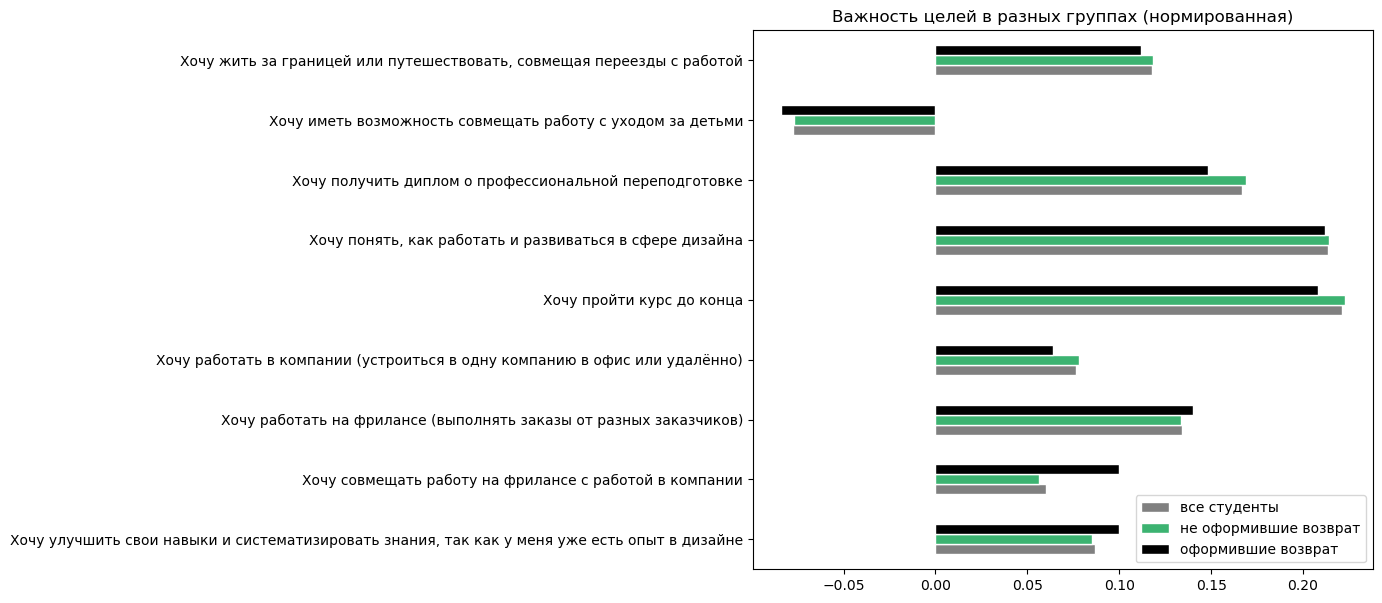

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

dfs = [
    df_goals,
    df_goals[df_goals['refund_reason'].isna()==True],
    df_goals[df_goals['refund_reason'].isna()==False]
]

df_annotation = [
    'все студенты', 'не оформившие возврат', 'оформившие возврат'
]

# Создаем пустой DataFrame для объединения всех группированных данных
combined_df = pd.DataFrame()

# Группируем данные для каждого DataFrame
for i in range(len(dfs)):
    df = dfs[i]
    grouped_df = df.groupby(['statement_content'])['value'].sum()
    grouped_df = grouped_df.sort_index(ascending=False).reset_index()
    #поскольку людей в группах разное количество,
    #найдём долю очков, которую занимает каждая цель
    grouped_df['share'] = grouped_df['value'] / grouped_df['value'].sum()
    grouped_df = grouped_df[['statement_content', 'share']].set_index('statement_content')
    
    # Добавляем группированные данные в общий DataFrame
    combined_df[df_annotation[i]] = grouped_df['share']

# Создаем график с объединенными данными
fig, ax = plt.subplots(figsize=(8, 7))
colors = ['gray', 'mediumseagreen', 'black']
combined_df.plot(
    kind='barh',
    ax=ax,
    ec='white',
    grid=False,
    color=colors
)

# Настройка осей и заголовка
plt.xlabel('')
plt.ylabel('')
plt.title('Важность целей в разных группах (нормированная)')

# Отображение графика
plt.show()

#### Вывод
Цели студентов, оформивших возврат, в основном не отличаются от целей остальных. Исключением является цель с совмещением фриланса и работы в компании - для оформивших возврат она важнее.

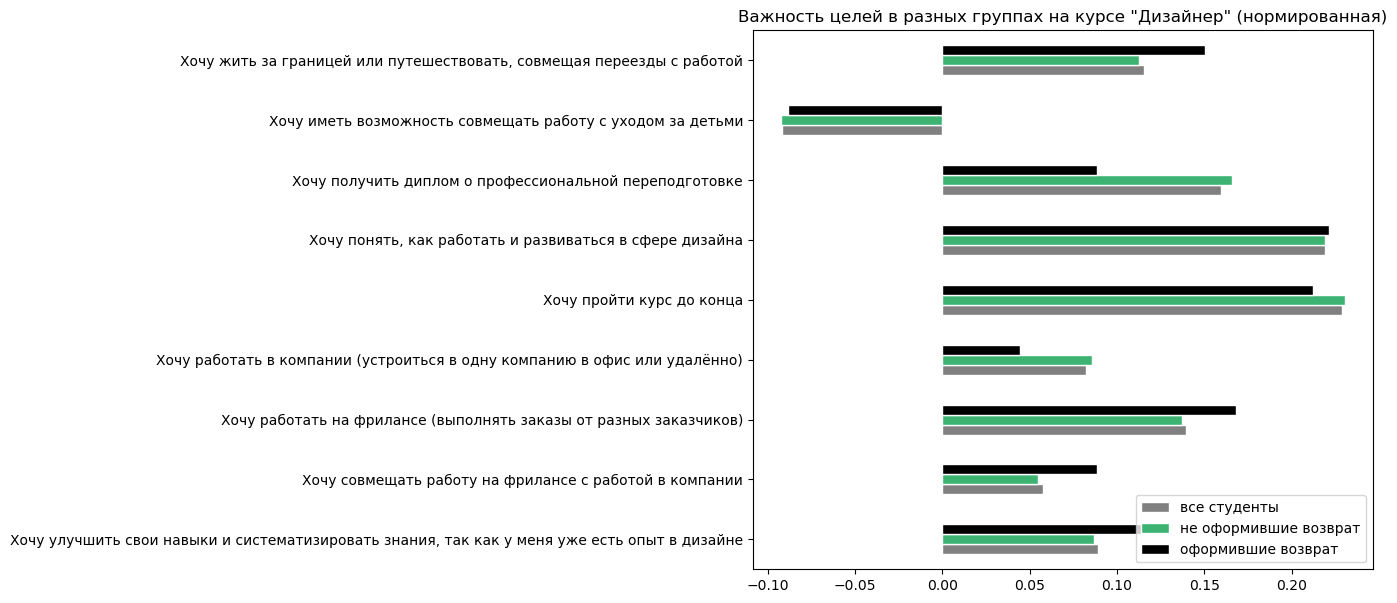

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

dfs = [
    df_goals[df_goals['profession_name_x']=='designer'],
    df_goals[(df_goals['profession_name_x']=='designer')
             & (df_goals['refund_reason'].isna()==True)],
    df_goals[(df_goals['profession_name_x']=='designer')
             & (df_goals['refund_reason'].isna()==False)]
]

df_annotation = [
    'все студенты', 'не оформившие возврат', 'оформившие возврат'
]

# Создаем пустой DataFrame для объединения всех группированных данных
combined_df = pd.DataFrame()

# Группируем данные для каждого DataFrame
for i in range(len(dfs)):
    df = dfs[i]
    grouped_df = df.groupby(['statement_content'])['value'].sum()
    grouped_df = grouped_df.sort_index(ascending=False).reset_index()
    #поскольку людей в группах разное количество,
    #найдём долю очков, которую занимает каждая цель
    grouped_df['share'] = grouped_df['value'] / grouped_df['value'].sum()
    grouped_df = grouped_df[['statement_content', 'share']].set_index('statement_content')
    
    # Добавляем группированные данные в общий DataFrame
    combined_df[df_annotation[i]] = grouped_df['share']

# Создаем график с объединенными данными
fig, ax = plt.subplots(figsize=(8, 7))
colors = ['gray', 'mediumseagreen', 'black']
combined_df.plot(
    kind='barh',
    ax=ax,
    ec='white',
    grid=False,
    color=colors
)

# Настройка осей и заголовка
plt.xlabel('')
plt.ylabel('')
plt.title('Важность целей в разных группах на курсе "Дизайнер" (нормированная)')

# Отображение графика
plt.show()

#### Вывод
Студенты, оформившие возврат, чаще хотят работать на фрилансе и жить за границей или путешествовать, реже хотят работать в одной компании. Для них значительно менее важен диплом о переподготовке. Также больше возвратов среди тех, кто уже имеет опыт в дизайне - скорее всего, курс базовый и не интересен опытным дизайнерам.

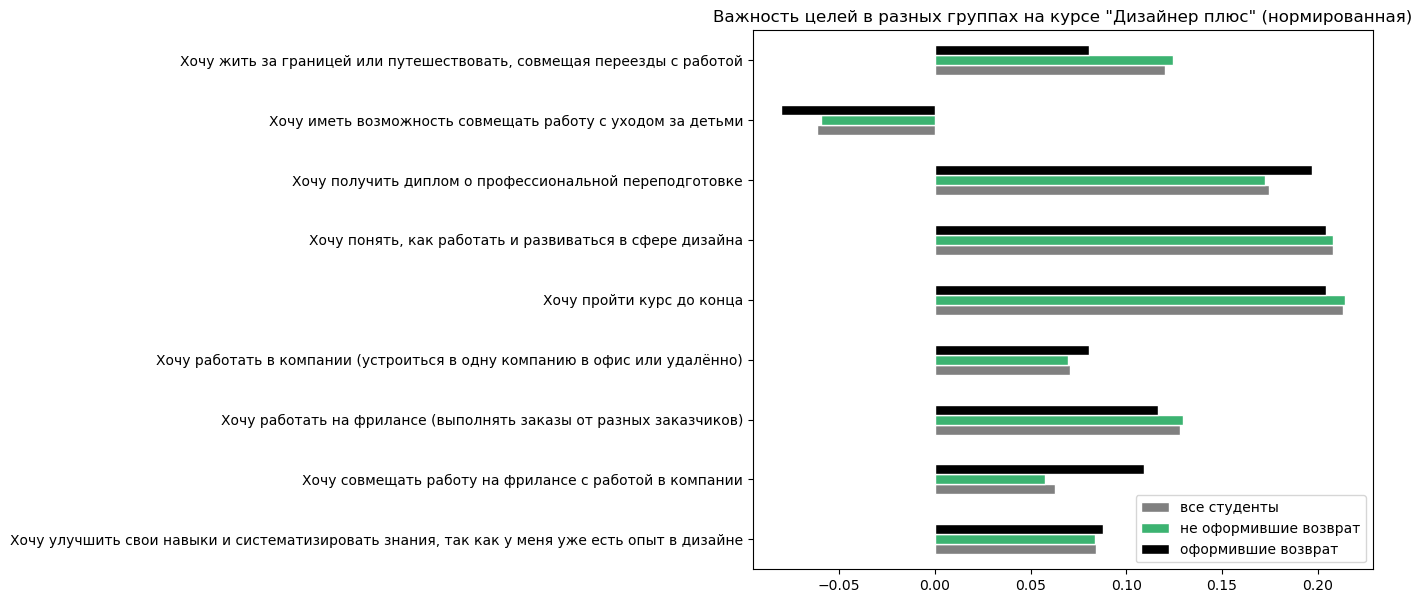

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

dfs = [
    df_goals[df_goals['profession_name_x']=='designer-plus'],
    df_goals[(df_goals['profession_name_x']=='designer-plus')
             & (df_goals['refund_reason'].isna()==True)],
    df_goals[(df_goals['profession_name_x']=='designer-plus')
             & (df_goals['refund_reason'].isna()==False)]
]

df_annotation = [
    'все студенты', 'не оформившие возврат', 'оформившие возврат'
]

# Создаем пустой DataFrame для объединения всех группированных данных
combined_df = pd.DataFrame()

# Группируем данные для каждого DataFrame
for i in range(len(dfs)):
    df = dfs[i]
    grouped_df = df.groupby(['statement_content'])['value'].sum()
    grouped_df = grouped_df.sort_index(ascending=False).reset_index()
    #поскольку людей в группах разное количество,
    #найдём долю очков, которую занимает каждая цель
    grouped_df['share'] = grouped_df['value'] / grouped_df['value'].sum()
    grouped_df = grouped_df[['statement_content', 'share']].set_index('statement_content')
    
    # Добавляем группированные данные в общий DataFrame
    combined_df[df_annotation[i]] = grouped_df['share']

# Создаем график с объединенными данными
fig, ax = plt.subplots(figsize=(8, 7))
colors = ['gray', 'mediumseagreen', 'black']
combined_df.plot(
    kind='barh',
    ax=ax,
    ec='white',
    grid=False,
    color=colors
)

# Настройка осей и заголовка
plt.xlabel('')
plt.ylabel('')
plt.title('Важность целей в разных группах на курсе "Дизайнер плюс" (нормированная)')

# Отображение графика
plt.show()

#### Вывод
Студенты, оформившие возврат, чаще хотят совмещать работу на фрилансе с работой в компании, реже хотят путешествовать или жить за границей. Те, кто уже имеет опыт в дизайне, делают возврат не чаще других групп - скорее всего курс им интересен.

### Оценим, как соотносятся между собой причины возврата и поставленные цели.
Используем методологию из предыдущего шага, но вместо всей таблицы “Цели” используем только таблицу возвратов и будем агрегировать оценку важности целей не по признаку оформления возврата, а по причине возврата. Нормировать оценку не будет необходимости. Итоговая формула расчёта важности цели будет выглядеть так:

$$ Imp = {\sum^n_{i=1}g}  $$

где Imp = важность цели, g = оценка важности цели из value, n = количество оценок

In [127]:
df_goals.head()

,date_response,user_id,current_cohort_x,cohort_x,profession_name_x,course_name,topic_name,sprint_position,lesson_name,statement_content,grade_content,value,client_id,payment_id,cohort_y,current_cohort_y,churn_date,churn_type,profession_name_y,churn_group,refund_reason
0,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу работать на фрилансе (выполнять заказы от разных заказчиков),Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,"Хочу понять, как работать и развиваться в сфере дизайна",Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу пройти курс до конца,Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,Хочу работать в компании (устроиться в одну компанию в офис или удалённо),Цель очень важна,2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,2023-06-01 15:30:37,1942250,designer_cohort_18,designer_cohort_18,designer,6. Паттерны,Как создать паттерн,29.0,Мини-проект. Создай паттерн,"Хочу жить за границей или путешествовать, совмещая переезды с работой",Цель абсолютно не важна,-2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [144]:
def shorten_statements(row):
    try:
        if row == 'Больше не получается совмещать с работой или учёбой вне Практикума':
            return 'Не получается совмещать'
        elif row == 'Личные причины: болезнь, дети, переезд, другие обстоятельства':
            return 'Личные причины'
        elif row == 'Был план пройти только часть курса':
            return 'Прошёл нужную часть'
        elif row == 'Не устраивает формат или качество сопровождения':
            return 'Формат или сопровождение'
        elif row == 'Некомфортно учиться с жёсткими сроками':
            return 'Жёсткие сроки'
        elif row == 'Перевожусь на другой курс в Практикуме':
            return 'Перевожусь'
        elif row == 'Стало ясно, что это не моё':
            return 'Не моё'
        elif row in ['Другое', 'Не указано']:
            return nan
        else:
            return row
    except:
        pass
    
df_goals['statement_shortened'] = df_goals['refund_reason'].apply(shorten_statements)
df_goals['statement_shortened'].unique()

array([nan, None, 'Формат или сопровождение', 'Прошёл нужную часть',
       'Не моё', 'Личные причины', 'Перевожусь',
       'Не получается совмещать', 'Финансовые сложности', 'Жёсткие сроки'],
      dtype=object)

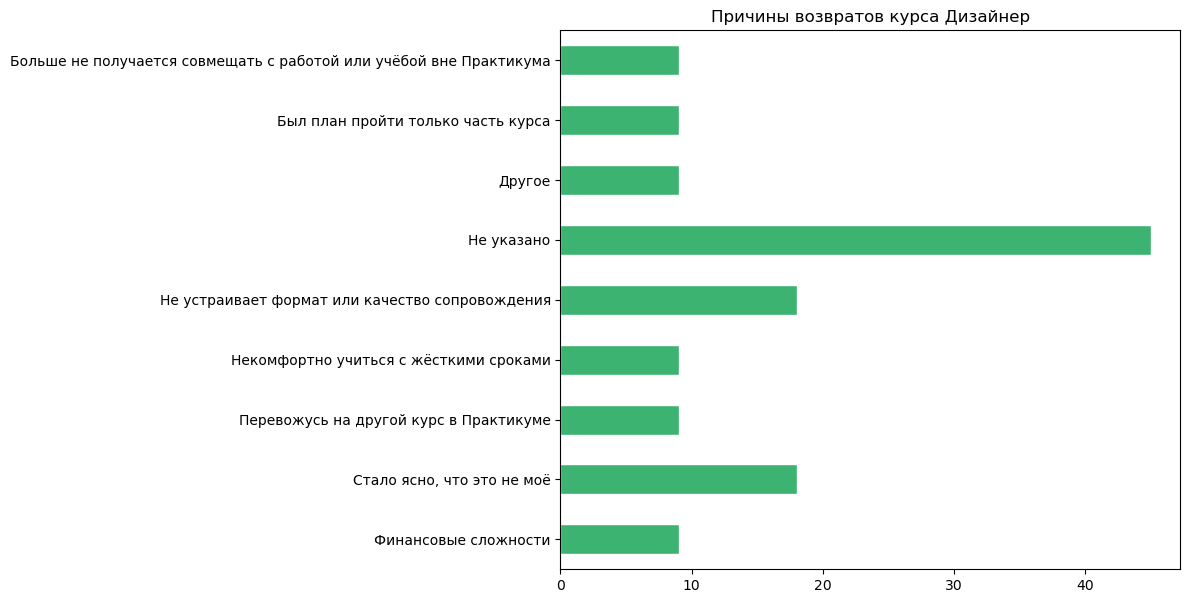

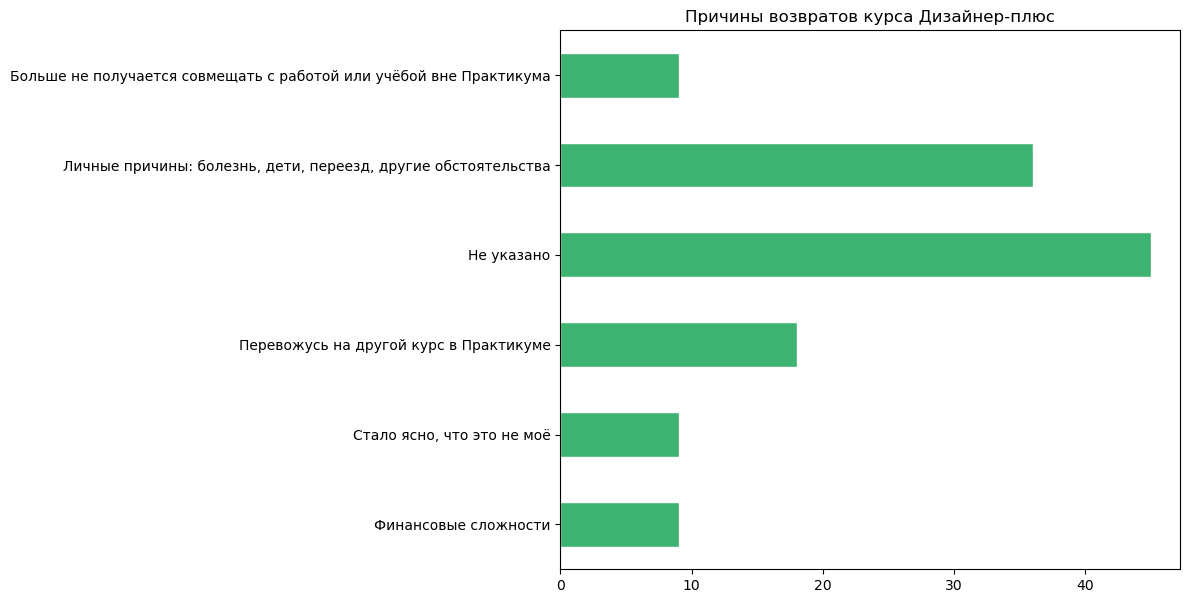

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    df_goals[df_goals['profession_name_x']=='designer'],
    df_goals[df_goals['profession_name_x']=='designer-plus']
]

df_annotation = [
    'Дизайнер', 'Дизайнер-плюс'
]

# Группируем данные для каждого DataFrame
for i in range(len(dfs)):
    df = dfs[i]
    fig, ax = plt.subplots(figsize=(8, 7))
    # Группируем значения по категориям и суммируем
    grouped_df = df.groupby(['refund_reason'])['user_id'].count()
    grouped_df = grouped_df.sort_index(ascending=False)
    
    # Создаем столбчатую диаграмму для столбца 'Value'
    grouped_df.to_frame().rename(columns=dict_names).plot(
        kind='barh', ax=ax, ec='white', color='mediumseagreen', grid=False, legend=False
    )
    
    # Настройка осей и заголовка
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Причины возвратов курса {df_annotation[i]}')
    
    # Отображение диаграммы
    plt.show()

#### Вывод
Чаще всего причина возвратов курса “Дизайнер” не указана, но на втором месте находятся формат и качество сопровождения и то, что пользователи понимают, что тема курса им не подходит.

Чаще всего причина возвратов курса “Дизайнер-плюс” не указана, но на втором месте находятся личные причины, а на третьем месте перевод на другой курс Практикума.

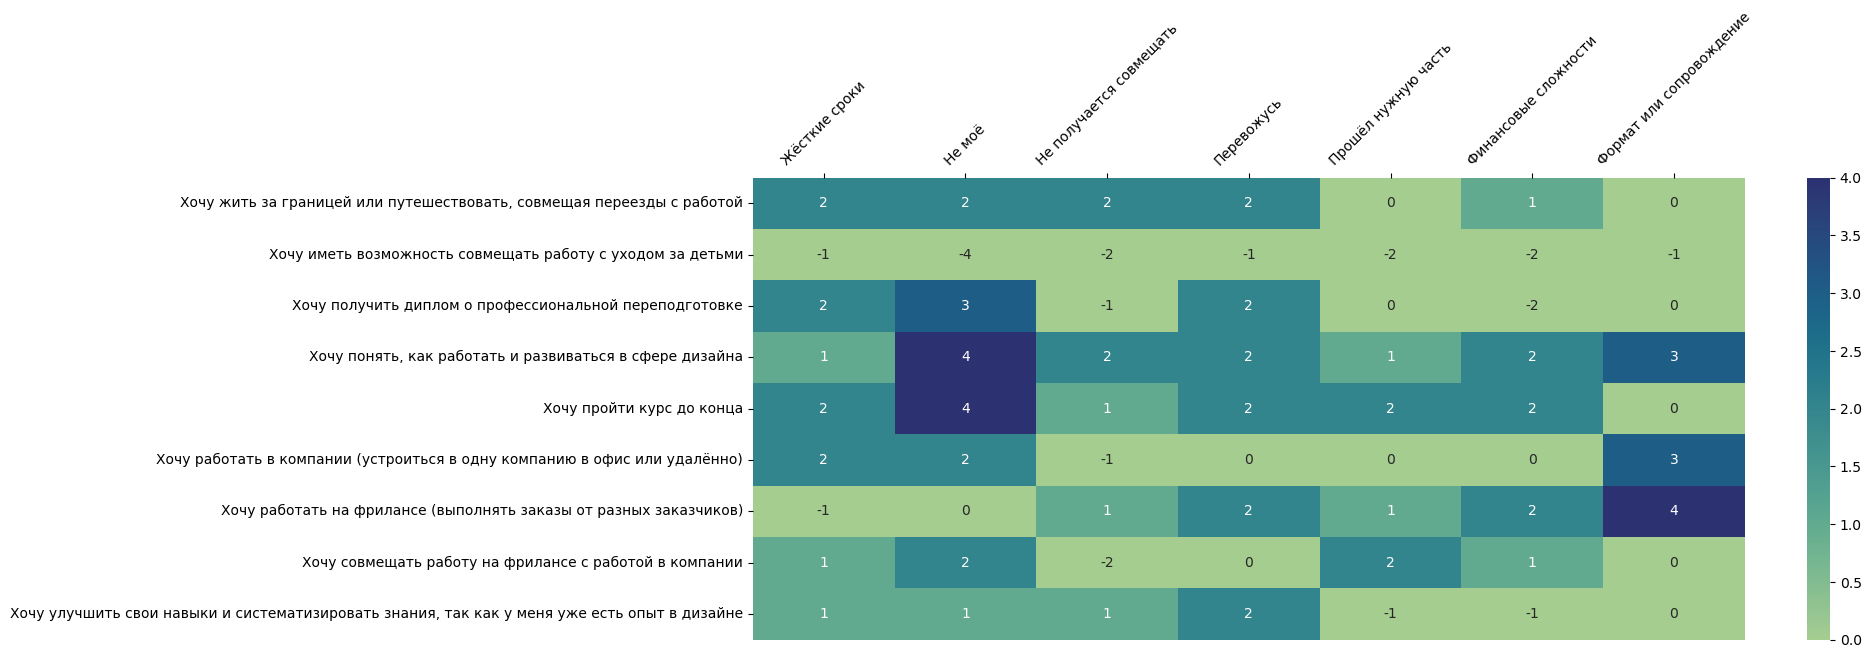

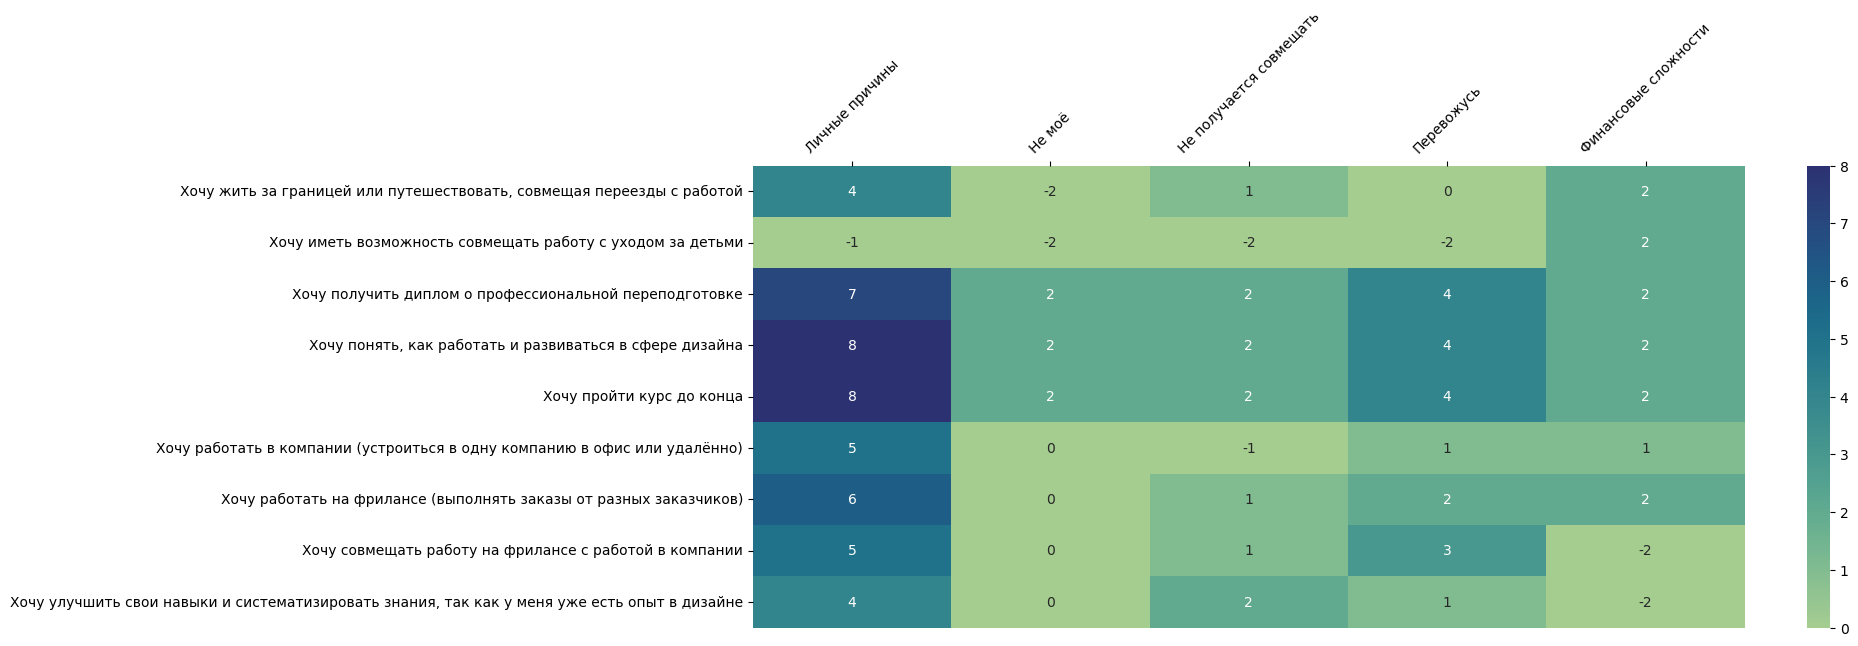

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    df_goals[df_goals['profession_name_x']=='designer'],
    df_goals[df_goals['profession_name_x']=='designer-plus']
]

for df in dfs:
    # Группируем значения по категориям и суммируем
    grouped_df = df.groupby(['statement_content', 'statement_shortened'])['value'].sum()
    grouped_df = grouped_df.sort_index(ascending=False).unstack()

    plt.figure(figsize=(16, 6));
    # Создаем тепловую карту (heatmap) с помощью seaborn
    ax = sns.heatmap(grouped_df, annot=True, cmap="crest", vmin=0, square=False)
    ax.set(xlabel="", ylabel="")
    ax.xaxis.tick_top()
    plt.xticks(rotation=45)

#### Вывод
Для тех, кто сделал возврат по причине “не моё”, важно было понять, хотят ли они развиваться в сфере дизайна и пройти курс до конца. Те, кому не понравился формат или сопровождение, отмечали важным как работу на фрилансе, так и работу в компании, а также хотели понять, как развиваться в сфере дизайна. Те, кто переводился, отмечали важным не только улучшение навыков, но и прохождение курса до конца и совмещение (то есть, скорее всего ушли и некоторые новички). Связи с какими-то конкретными причинами для других целей не найдено.

Для студентов, оформивших возврат по личной причине, важнее всего было пройти курс до конца, понять, как работать и развиваться в сфере дизайна и получить диплом о профессиональной переподготовке.

# Бизнес-выводы
У студентов, делающих возврат курса “Дизайн” есть определённое представление о работе дизайнера (фриланс, совмещение с основной работой, путешествия), которого они хотят достичь, но, видимо, не достигают. 

Рекомендация: активнее управлять ожиданиями студентов до момента поступления на курс.

У студентов, делающих возврат курса “Дизайн-плюс” выше потребность в совмещении с основной работой, но уходят они чаще всего из-за личных причин. 

Рекомендация: растянуть курс, снизив нагрузку в неделю, либо пересчитать обещанное время нагрузки в неделю на лендинге, чтобы студенты могли точнее оценивать свою способность пройти курс.

Не все студенты с опытом, кто уходил с курса “Дизайн”, перешли на другой курс в Практикуме. 

Рекомендация: перенаправлять людей с опытом с курса “Дизайнер” на курс “Дизайнер-плюс”.

Чаще всего студенты при возврате не указывают причину, это не позволяет точно узнать их проблемы в прохождении курса. Возможно, причины были совсем иными, не из списка.

Рекомендация: сделать вопрос обязательным и оставить поле, в которое человек сможет сам вписать причину возврата.

[В начало](#description)